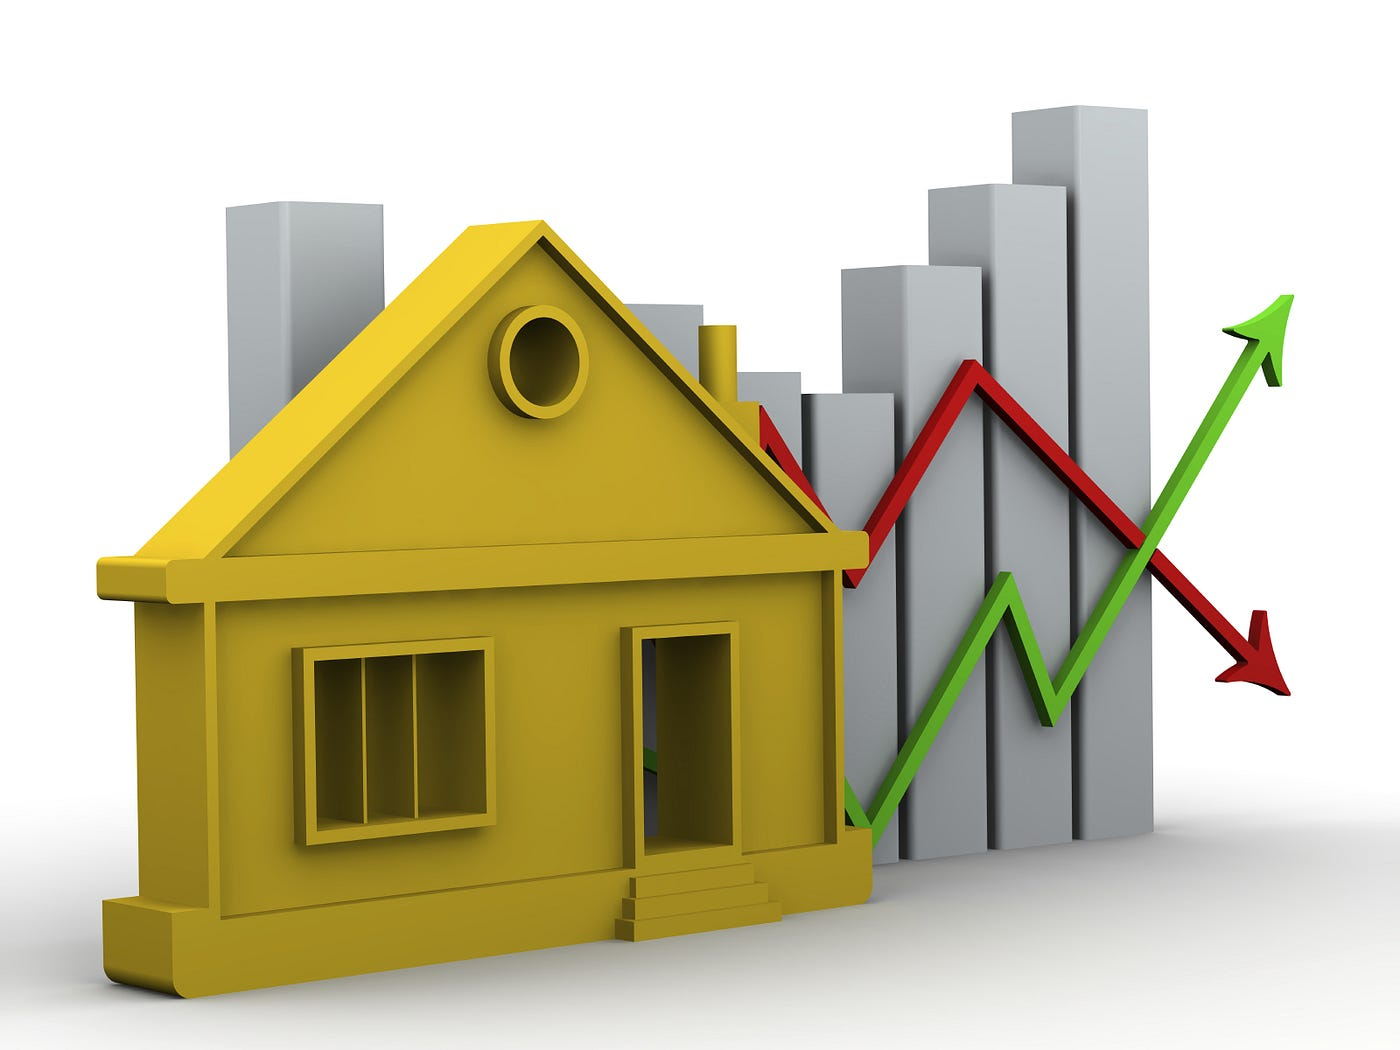





## House Price Prediction

The project is divided into the following sections:
- Data Collection and Preparation
- Exploratory Data Analysis and Visualization
- Data Preprocessing
- Model Building and Evaluation

### 1. Data Collection and Preparation

Let's first import the required libraries and have a look at the dataset and understand the size, attribute names and their types etc.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("calven22/usa-key-macroeconomic-indicators")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Bibin\.cache\kagglehub\datasets\calven22\usa-key-macroeconomic-indicators\versions\3


In [4]:
df_macro = pd.read_csv(r"C:\Users\Bibin\.cache\kagglehub\datasets\calven22\usa-key-macroeconomic-indicators\versions\3\macro_monthly.csv")

In [5]:
df_macro.head()

DATE  unrate   psr        m2   dspic     pce  reer         ir  \
0  1981-01-01     7.5  10.9  1612.900  4980.4  1870.0   NaN  12.568571   
1  1981-02-01     7.4  10.8  1608.125  4965.0  1884.2   NaN  13.194444   
2  1981-03-01     7.4  10.8  1629.400  4979.0  1902.9   NaN  13.115909   
3  1981-04-01     7.2  10.9  1665.575  4965.1  1904.4   NaN  13.679524   
4  1981-05-01     7.5  11.0  1655.150  4974.8  1913.8   NaN  14.099500   

        ffer  tcs   indpro  ccpi  
0  19.084516  NaN  51.1668  85.4  
1  15.934286  NaN  50.9509  85.9  
2  14.703871  NaN  51.2066  86.4  
3  15.719000  NaN  50.9711  87.0  
4  18.517742  NaN  51.2645  87.8

In [6]:
df_macro = df_macro.drop_duplicates()

In [7]:
df_macro.isnull().sum()

DATE        0
unrate      0
psr         0
m2          0
dspic       0
pce         0
reer      156
ir          0
ffer        0
tcs       144
indpro      0
ccpi        0
dtype: int64

In [8]:
# Fill missing values in 'reer' and 'tcs' with the median
df_macro['reer'].fillna(df_macro['reer'].median(), inplace=True)
df_macro['tcs'].fillna(df_macro['tcs'].median(), inplace=True)

# Confirm that there are no more missing values
print(df_macro.isnull().sum())

DATE      0
unrate    0
psr       0
m2        0
dspic     0
pce       0
reer      0
ir        0
ffer      0
tcs       0
indpro    0
ccpi      0
dtype: int64


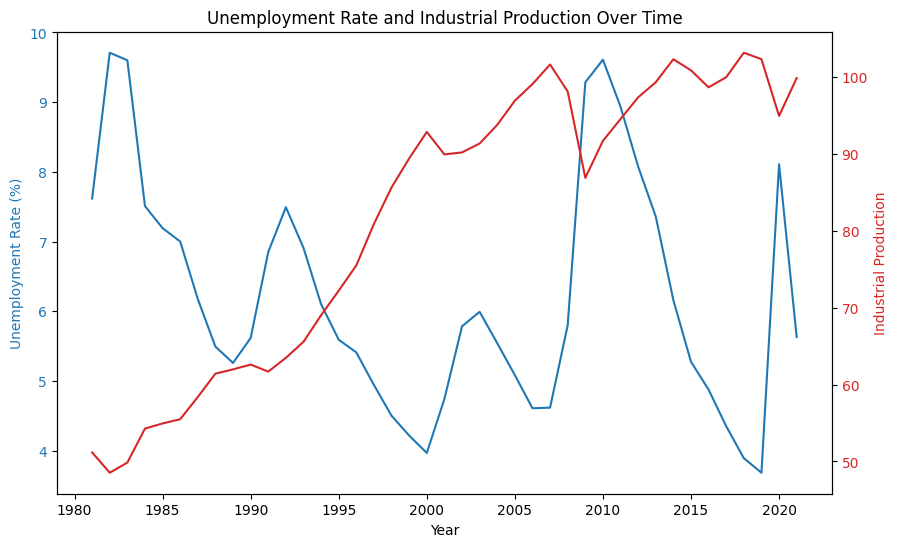

In [9]:
# Convert the 'DATE' column to datetime
df_macro['DATE'] = pd.to_datetime(df_macro['DATE'])

# Extract the year from the 'DATE' column
df_macro['year'] = df_macro['DATE'].dt.year

# Group by year to get annual averages of the key indicators
annual_macro = df_macro.groupby('year').agg({
    'unrate': 'mean',       # Average unemployment rate
    'psr': 'mean',          # Average personal savings rate
    'm2': 'mean',           # Average money supply (M2)
    'dspic': 'mean',        # Average disposable personal income
    'pce': 'mean',          # Average personal consumption expenditures
    'ir': 'mean',           # Average interest rate
    'indpro': 'mean',       # Average industrial production
    'ccpi': 'mean'          # Average consumer price index (inflation)
}).reset_index()

# Plot key indicators over time
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting Unemployment Rate
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.plot(annual_macro['year'], annual_macro['unrate'], color='tab:blue', label='Unemployment Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for Industrial Production
ax2 = ax1.twinx()
ax2.set_ylabel('Industrial Production', color='tab:red')
ax2.plot(annual_macro['year'], annual_macro['indpro'], color='tab:red', label='Industrial Production')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Unemployment Rate and Industrial Production Over Time')
plt.show()

In [10]:
#Displaying all the columns in the dataframe

pd.pandas.set_option('display.max_columns', None)

In [11]:
# The below housing data has been sourced from two distinct sources from different decades and merged based on the 'id' column

In [12]:
df = pd.read_csv('house_train.csv')

In [13]:
# Let's take a look at the first few rows
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Dataset Overview

The dataset consists of 1460 observations (houses) and 81 features. The features capture various aspects of each house, such as the overall quality, number of rooms, year built, garage area, and sale price, among others. The dataset includes both **numeric** (38) and **categorical** (43) features.

#### Key Information:
- **Total observations**: 1460
- **Total features**: 81
- **Numeric features**: 38 (e.g., `LotFrontage`, `GrLivArea`, `GarageCars`)
- **Categorical features**: 43 (e.g., `MSZoning`, `Neighborhood`, `GarageType`)

#### Missing Data:
Several features contain missing values:
- **LotFrontage**: 259 missing values (17.74%)
- **Alley**: 1369 missing values (93.77%)
- **MasVnrType**: 872 missing values (59.73%)
- **FireplaceQu**: 690 missing values (47.26%)
- **PoolQC**: 1453 missing values (99.52%)
- **Fence**: 1179 missing values (80.75%)
- **MiscFeature**: 1406 missing values (96.30%)

#### Data Types:
- **Integer and Float**: 38 features including `SalePrice`, `LotFrontage`, `GrLivArea`, and `GarageCars`.
- **Object (Categorical)**: 43 features including `MSZoning`, `Neighborhood`, and `SaleType`.

In [15]:
print(df.shape)

(1460, 81)


In [16]:
df = df.drop_duplicates()

In [17]:
print(df.shape)

(1460, 81)


#### **Summary of the dataset : 1460 rows, 81 columns**

In [18]:
print(df.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In this step, we explore the dataset to understand its structure. We observe that the dataset contains 38 numerical features, such as 'OverallQual', 'GrLivArea', and 'SalePrice'. Key statistics show that 'SalePrice' has an average value of **$180921.195**, indicating the central tendency of house prices.

Let's check how SalePrice is distributed!

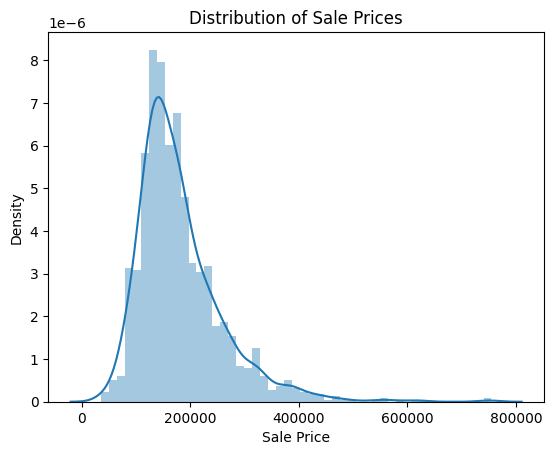

In [19]:
# Plotting the distribution of SalePrice
sns.distplot(df['SalePrice'], kde=True)

# Show the plot
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.show()

The distribution plot of house prices shows that the SalePrice variable is right-skewed, indicating that most houses are priced lower, but there are a few high-priced houses in the dataset.

In [20]:
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


- Skewness (1.88) tells that there are more houses with lower prices and a few houses with significantly higher prices.
- Kurtosis = 6.536282, indicating that the SalePrice distribution has heavy tails and is leptokurtic (more peaked than a normal distribution), meaning more extreme values (outliers) are present.

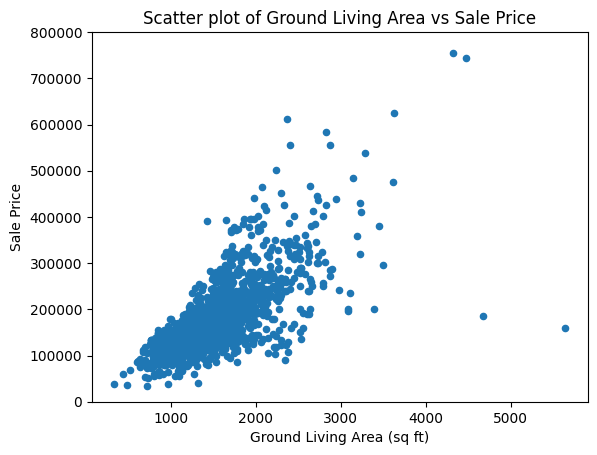

In [21]:
var = 'GrLivArea'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.title('Scatter plot of Ground Living Area vs Sale Price')
plt.xlabel('Ground Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

The scatter plot clearly shows a positive relationship between GrLivArea (ground living area) and SalePrice (house prices). As the living area increases, the house prices tend to increase as well. However, there are a few noticeable outliers, where houses with a very large living area (above 4000 sq ft) have relatively lower prices (**$200,000$**), and a few have extremely high prices (above **$600,000$**).

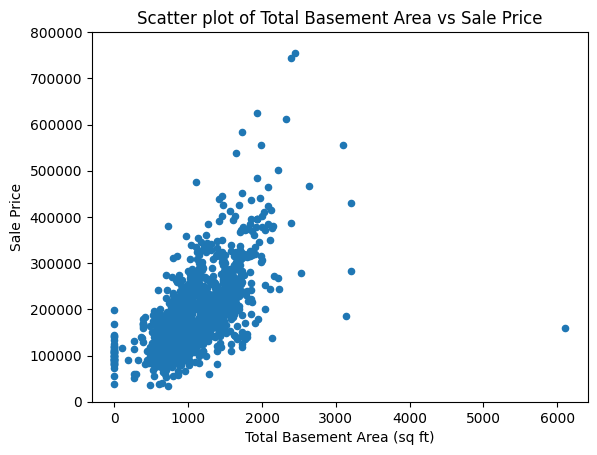

In [22]:
var = 'TotalBsmtSF'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
plt.title('Scatter plot of Total Basement Area vs Sale Price')
plt.xlabel('Total Basement Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

The scatter plot shows a positive relationship between the total basement area and sale price. As the size of the basement increases, the sale price of the house also tends to rise. However, there are a few outliers visible, especially around basement sizes greater than 3,000 square feet, where house prices are relatively lower than expected, and a house with a basement larger than 6,000 square feet that has a lower price.

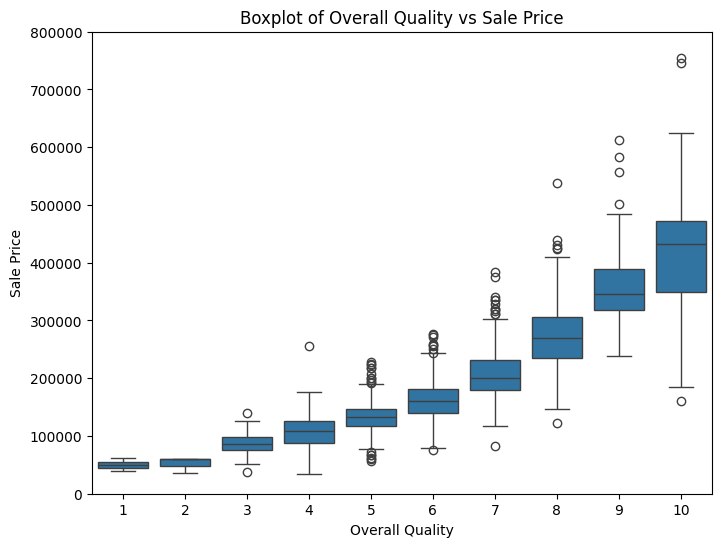

In [23]:
var = 'OverallQual'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.title('Boxplot of Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

The box plot above shows the distribution of house prices across different overall quality ratings. As expected, houses with higher quality ratings tend to have higher sale prices. The median sale price increases consistently with the quality rating (1 - 10). Notably, there are several outliers, particularly in the lower quality categories(see OverallQual = 5), where a few houses are priced much higher than the majority of houses with the same quality rating (OverallQual 6 &7).

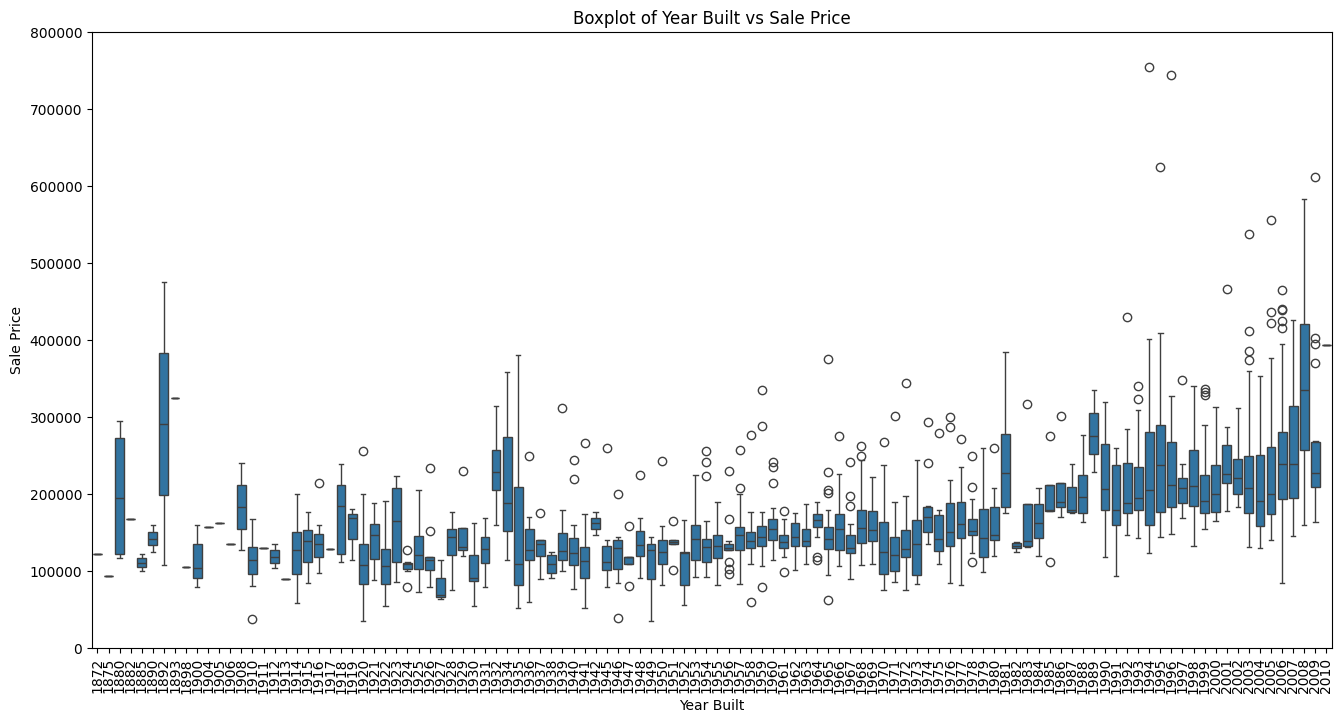

In [24]:
var = 'YearBuilt'
data = pd.concat([df['SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)
plt.title('Boxplot of Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

The box plot shows how house prices vary depending on the year the house was built. Generally, homes built after the 2000s tend to have higher and more varied sale prices, while older homes (pre-1950s) display less price variability but still feature some high-value outliers (possibly because of historical significance). The presence of outliers in recent years suggests that some homes are custom-built or have luxury features, resulting in significantly higher sale prices than others built in the same period.

In [25]:
## Inferences from economic indicator

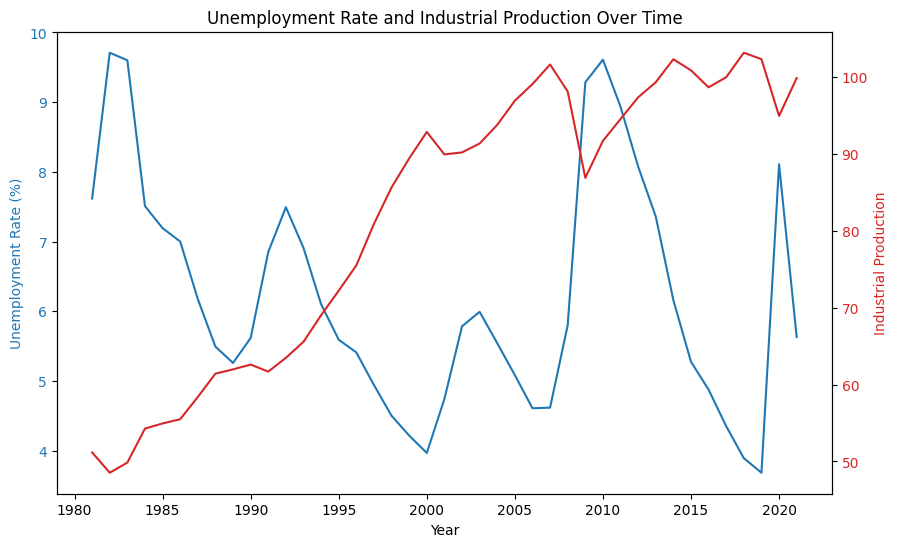

In [26]:
# Convert the 'DATE' column to datetime
df_macro['DATE'] = pd.to_datetime(df_macro['DATE'])

# Extract the year from the 'DATE' column
df_macro['year'] = df_macro['DATE'].dt.year

# Group by year to get annual averages of the key indicators
annual_macro = df_macro.groupby('year').agg({
    'unrate': 'mean',       # Average unemployment rate
    'psr': 'mean',          # Average personal savings rate
    'm2': 'mean',           # Average money supply (M2)
    'dspic': 'mean',        # Average disposable personal income
    'pce': 'mean',          # Average personal consumption expenditures
    'ir': 'mean',           # Average interest rate
    'indpro': 'mean',       # Average industrial production
    'ccpi': 'mean'          # Average consumer price index (inflation)
}).reset_index()

# Plot key indicators over time
fig, ax1 = plt.subplots(figsize=(10,6))

# Plotting Unemployment Rate
ax1.set_xlabel('Year')
ax1.set_ylabel('Unemployment Rate (%)', color='tab:blue')
ax1.plot(annual_macro['year'], annual_macro['unrate'], color='tab:blue', label='Unemployment Rate')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for Industrial Production
ax2 = ax1.twinx()
ax2.set_ylabel('Industrial Production', color='tab:red')
ax2.plot(annual_macro['year'], annual_macro['indpro'], color='tab:red', label='Industrial Production')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Unemployment Rate and Industrial Production Over Time')
plt.show()

The 2008 financial crisis had a profound impact on the U.S. economy, as evidenced by the sharp spike in unemployment and the steep decline in industrial production. Both of these factors contributed to a significant reduction in house sale prices during that time. As the economy recovered in the following years, with improvements in industrial production and falling unemployment rates, house prices also gradually recovered.

#### Identifying Numerical Variables

In [27]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [28]:
print(f"Number of numerical features: {numerical_features}")

Number of numerical features: ['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [29]:
print(f"Number of numerical features: {len(numerical_features)}")

Number of numerical features: 38


In [30]:
df[numerical_features].head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

From the dataframe, it is quite visible that there are **four** year variables: "YearBuilt", "YearRemodAdd", "GarageYrBlt", "YrSold"

#### Identifying Temporal Variables (Datetime Variables)

In [31]:
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

In [32]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

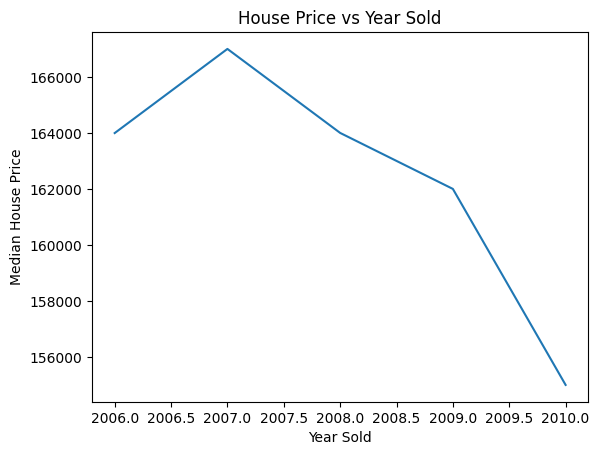

In [33]:
## Checking whether there is a relationship between the year in which the house is sold and sales price
import matplotlib.pyplot as plt

df.groupby('YrSold')['SalePrice'].median().plot(kind='line')
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs Year Sold")
plt.show()

**Usualy house price increases as year passes by. Howeever, the sales price decreases after 2007. Need to analyse further!!**

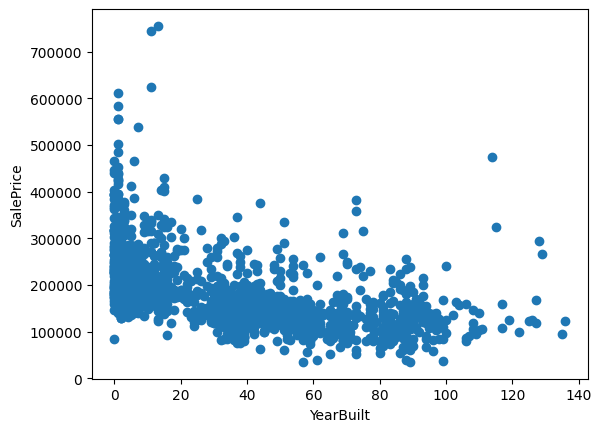

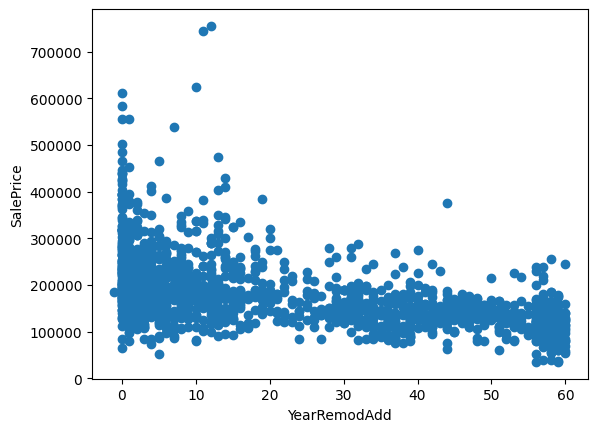

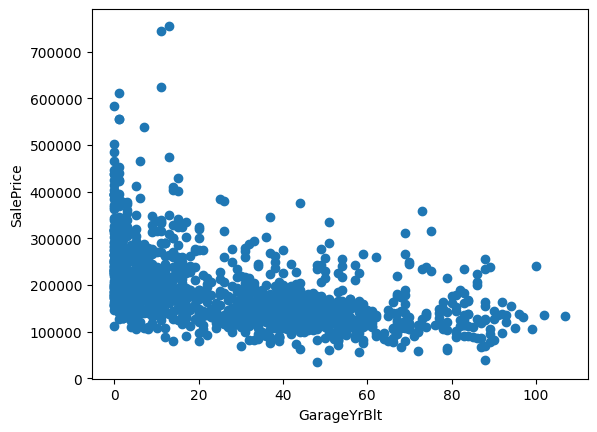

In [34]:
## Here we will compare the difference between all years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        df1=df.copy()
        ## We will capture the difference between year variable and year the house was sold for
        df1[feature]=df1['YrSold']-df1[feature]

        plt.scatter(df1[feature],df1['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

 - The older houses have lower sales price
 - Recently modeled houses have higher price
 - The buyers do place high value on new garages

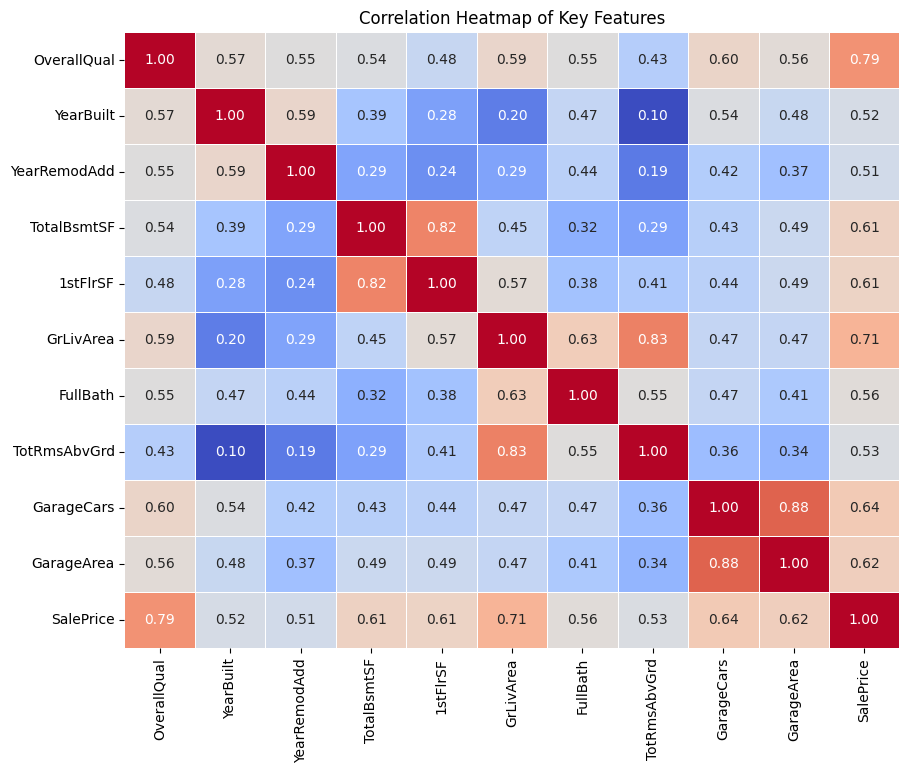

In [35]:
# Selecting only numeric features from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculating the correlation matrix for numeric features
corrmat = numeric_df.corr()

# Selecting features highly correlated with SalePrice (threshold of 0.5)
top_corr_features = corrmat.index[abs(corrmat["SalePrice"]) > 0.5]

# Creating a heatmap for the top correlated features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df[top_corr_features].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('Correlation Heatmap of Key Features')
plt.show()

In [36]:
import altair as alt

# Convert correlation matrix to long-form data
corr_df = numeric_df[top_corr_features].corr().stack().reset_index()
corr_df.columns = ['Feature1', 'Feature2', 'Correlation']

# Create Altair heatmap
heatmap = alt.Chart(corr_df).mark_rect().encode(
    alt.X('Feature1:O', title=None),
    alt.Y('Feature2:O', title=None),
    alt.Color('Correlation:Q', scale=alt.Scale(scheme='redblue')),
    tooltip=['Feature1', 'Feature2', 'Correlation']
).properties(
    title='Correlation Heatmap of Key Features',
    width=600,
    height=400
)

# Display the heatmap
heatmap.display()


alt.Chart(...)

**Inferences**
- OverallQual and SalePrice have a strong positive correlation (~0.79), which indicates that better overall quality is strongly associated with higher house prices.
- GrLivArea also has a strong positive correlation with SalePrice (~0.7), showing that larger living areas generally lead to higher prices.
- GarageCars and GarageArea are also positively correlated with SalePrice (0.64 and 0.62), suggesting that homes with larger or more garages are priced higher.

- TotalBsmtSF and SalePrice show a positive correlation (~0.6135), which means that larger basement areas are generally associated with higher sale prices.
- YearBuilt and YearRemodAdd show a moderate correlation (~0.5) with SalePrice, suggesting that newer homes or those remodeled recently tend to be more expensive.

- GarageArea and GarageCars have a very high correlation (~0.88), indicating multicollinearity. This may affect model performance, so we might consider keeping only one of these in the model.
- TotalBsmtSF and 1stFlrSF are also highly correlated (~0.819), indicating that homes with larger basements tend to have larger first-floor areas as well.

In [102]:
import hiplot as hip

# Select the top correlated features and SalePrice for HiPlot
hip_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']]

# Display the parallel coordinates plot
hip.Experiment.from_dataframe(hip_df).display()

<IPython.core.display.Javascript object>

In [103]:
import hiplot as hip

# Adding color based on SalePrice to see how features impact prices
hip_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']]
hip_df['SalePrice_Category'] = pd.qcut(hip_df['SalePrice'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Display the HiPlot with color-coded sale price categories
hip.Experiment.from_dataframe(hip_df).display()

<IPython.core.display.Javascript object>

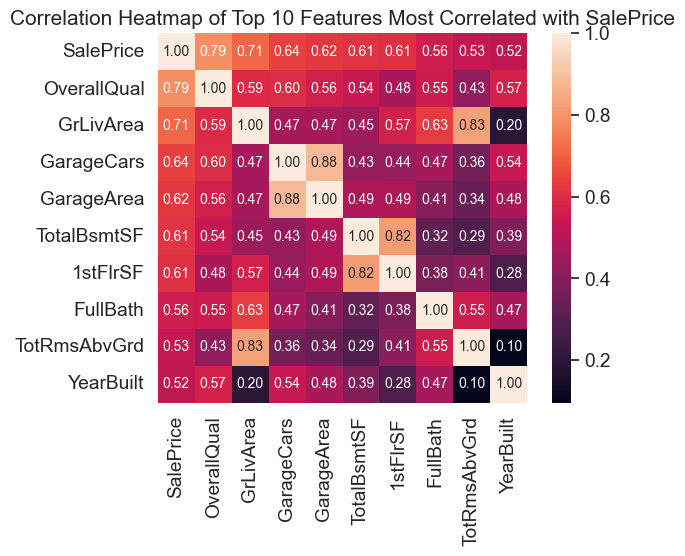

In [39]:
# Number of variables to include in the heatmap
k = 10 

# Get the top 10 variables most correlated with SalePrice
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

# Compute the correlation matrix of these top 10 variables
cm = np.corrcoef(df[cols].values.T)

# Set the font scale for readability
sns.set(font_scale=1.25)

# Create a heatmap
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)

# Display the heatmap
plt.title('Correlation Heatmap of Top 10 Features Most Correlated with SalePrice')
plt.show()

- YearBuilt (0.52) and TotRmsAbvGrd (0.53) show moderate correlations with SalePrice, suggesting that newer houses and houses with more rooms above ground are generally priced higher

- The heatmap shows the top 10 features most correlated with SalePrice. Key features like OverallQual and GrLivArea have the strongest positive relationships with house prices. Also, features such as GarageCars, GarageArea, and TotalBsmtSF also contribute significantly to house prices.
- Multicollinearity between features like GarageCars and GarageArea suggests that these features provide overlapping information, which could be simplified in the model.

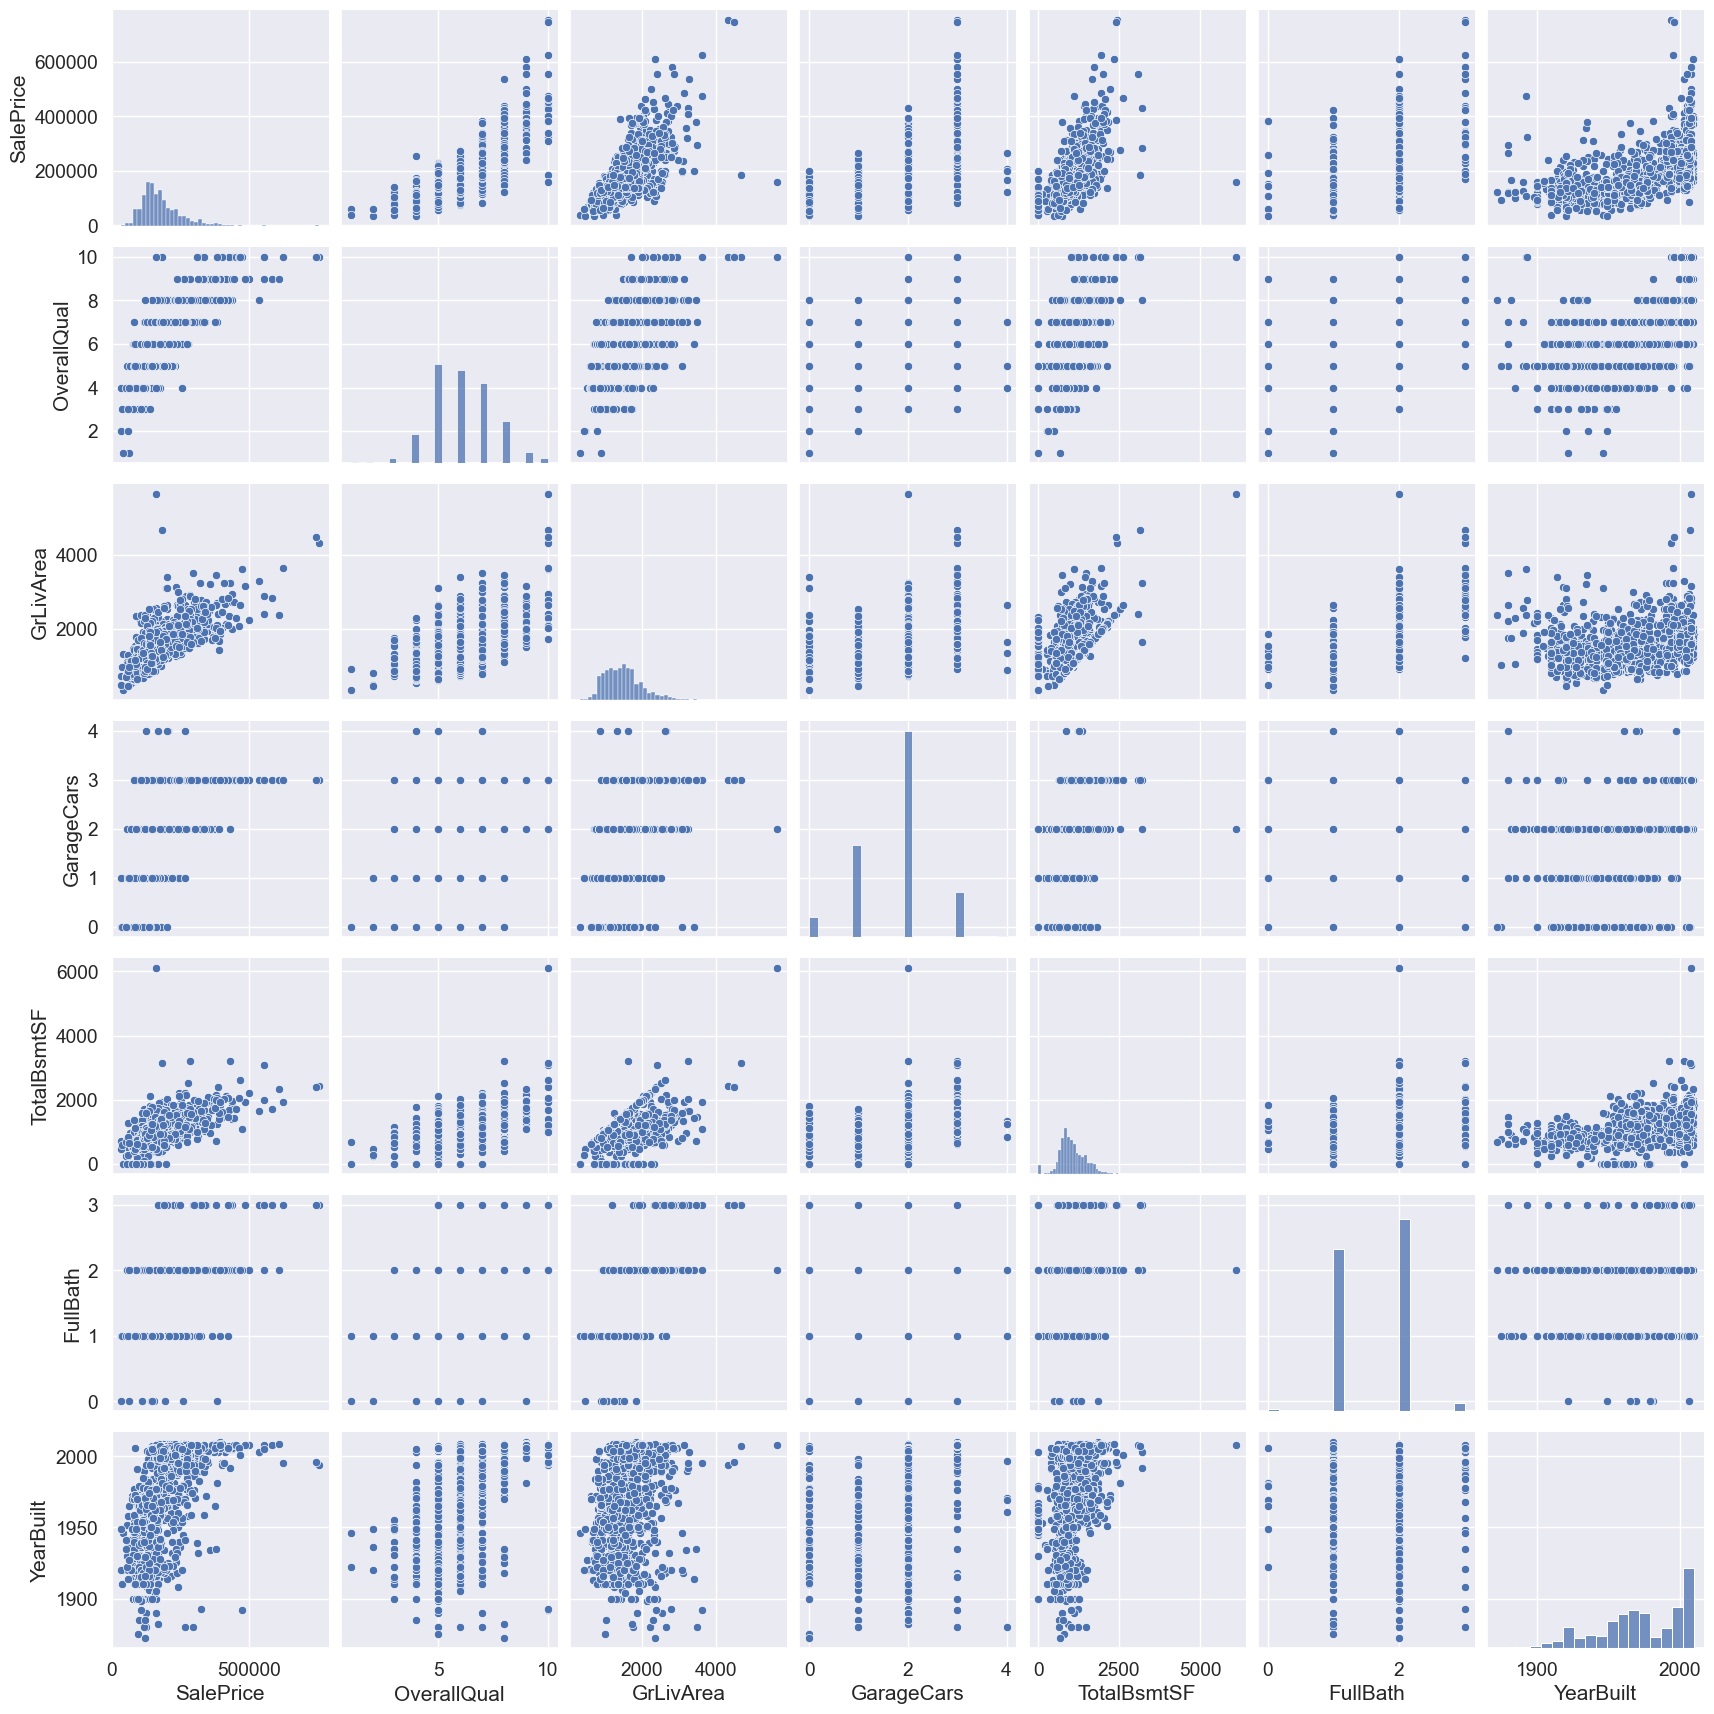

In [40]:
# Set of columns for the pair plot
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

# Create pair plot for selected columns
sns.pairplot(df[cols], height=2.5)
plt.show()

- House prices are right-skewed, meaning most houses are priced on the lower end with fewer higher-priced homes.
- There is a clear positive correlation between OverallQual (overall quality) and SalePrice. As the overall quality increases, the house price tends to increase.
- Houses with the highest quality ratings (8-10) tend to cluster at higher price points (400,000).
- As the living area increases, the sale price rises.
- Houses with more garage spaces (GarageCars) generally sell for more. Houses with 3 or more garage spaces tend to be priced above 300,000.
- Houses with very large basements (above 2000 sq ft) tend to be priced higher, but there are some outliers.
- Houses with more full bathrooms tend to have higher prices.
- Newer houses tend to sell for more, showing a positive correlation between YearBuilt and SalePrice. Houses built after 2000 have higher sale prices, with several priced above 400,000.

### 2. Data Cleaning

#### Missing data

Important questions when thinking about missing data:

Key questions to consider when addressing missing data:
- How much data is missing?
- Is the missing data random, or does it follow a pattern?

These questions are crucial because missing data can reduce the sample size, potentially hindering analysis. From a substantive standpoint, it's important to ensure that the missing data does not introduce bias or conceal significant patterns.

In [41]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 1]

for feature in features_na:
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 2)
    print(f"Feature '{feature}': {missing_percentage}% missing values")

Feature 'LotFrontage': 17.74% missing values
Feature 'Alley': 93.77% missing values
Feature 'MasVnrType': 59.73% missing values
Feature 'MasVnrArea': 0.55% missing values
Feature 'BsmtQual': 2.53% missing values
Feature 'BsmtCond': 2.53% missing values
Feature 'BsmtExposure': 2.6% missing values
Feature 'BsmtFinType1': 2.53% missing values
Feature 'BsmtFinType2': 2.6% missing values
Feature 'FireplaceQu': 47.26% missing values
Feature 'GarageType': 5.55% missing values
Feature 'GarageYrBlt': 5.55% missing values
Feature 'GarageFinish': 5.55% missing values
Feature 'GarageQual': 5.55% missing values
Feature 'GarageCond': 5.55% missing values
Feature 'PoolQC': 99.52% missing values
Feature 'Fence': 80.75% missing values
Feature 'MiscFeature': 96.3% missing values


In [42]:
# Calculate total and percentage of missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

# Combine total and percentage into one DataFrame
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# Display the top 20 features with the most missing data
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
MasVnrType      872  0.597260
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageYrBlt      81  0.055479
GarageCond       81  0.055479
GarageType       81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtFinType2     38  0.026027
BsmtExposure     38  0.026027
BsmtQual         37  0.025342
BsmtCond         37  0.025342
BsmtFinType1     37  0.025342
MasVnrArea        8  0.005479
Electrical        1  0.000685
Id                0  0.000000

The table above displays the top 20 features with missing data, sorted by both total count and percentage of missing values.

**Since they are missing values, it is important to find the  relationship betweeen missing values and Sales Price**

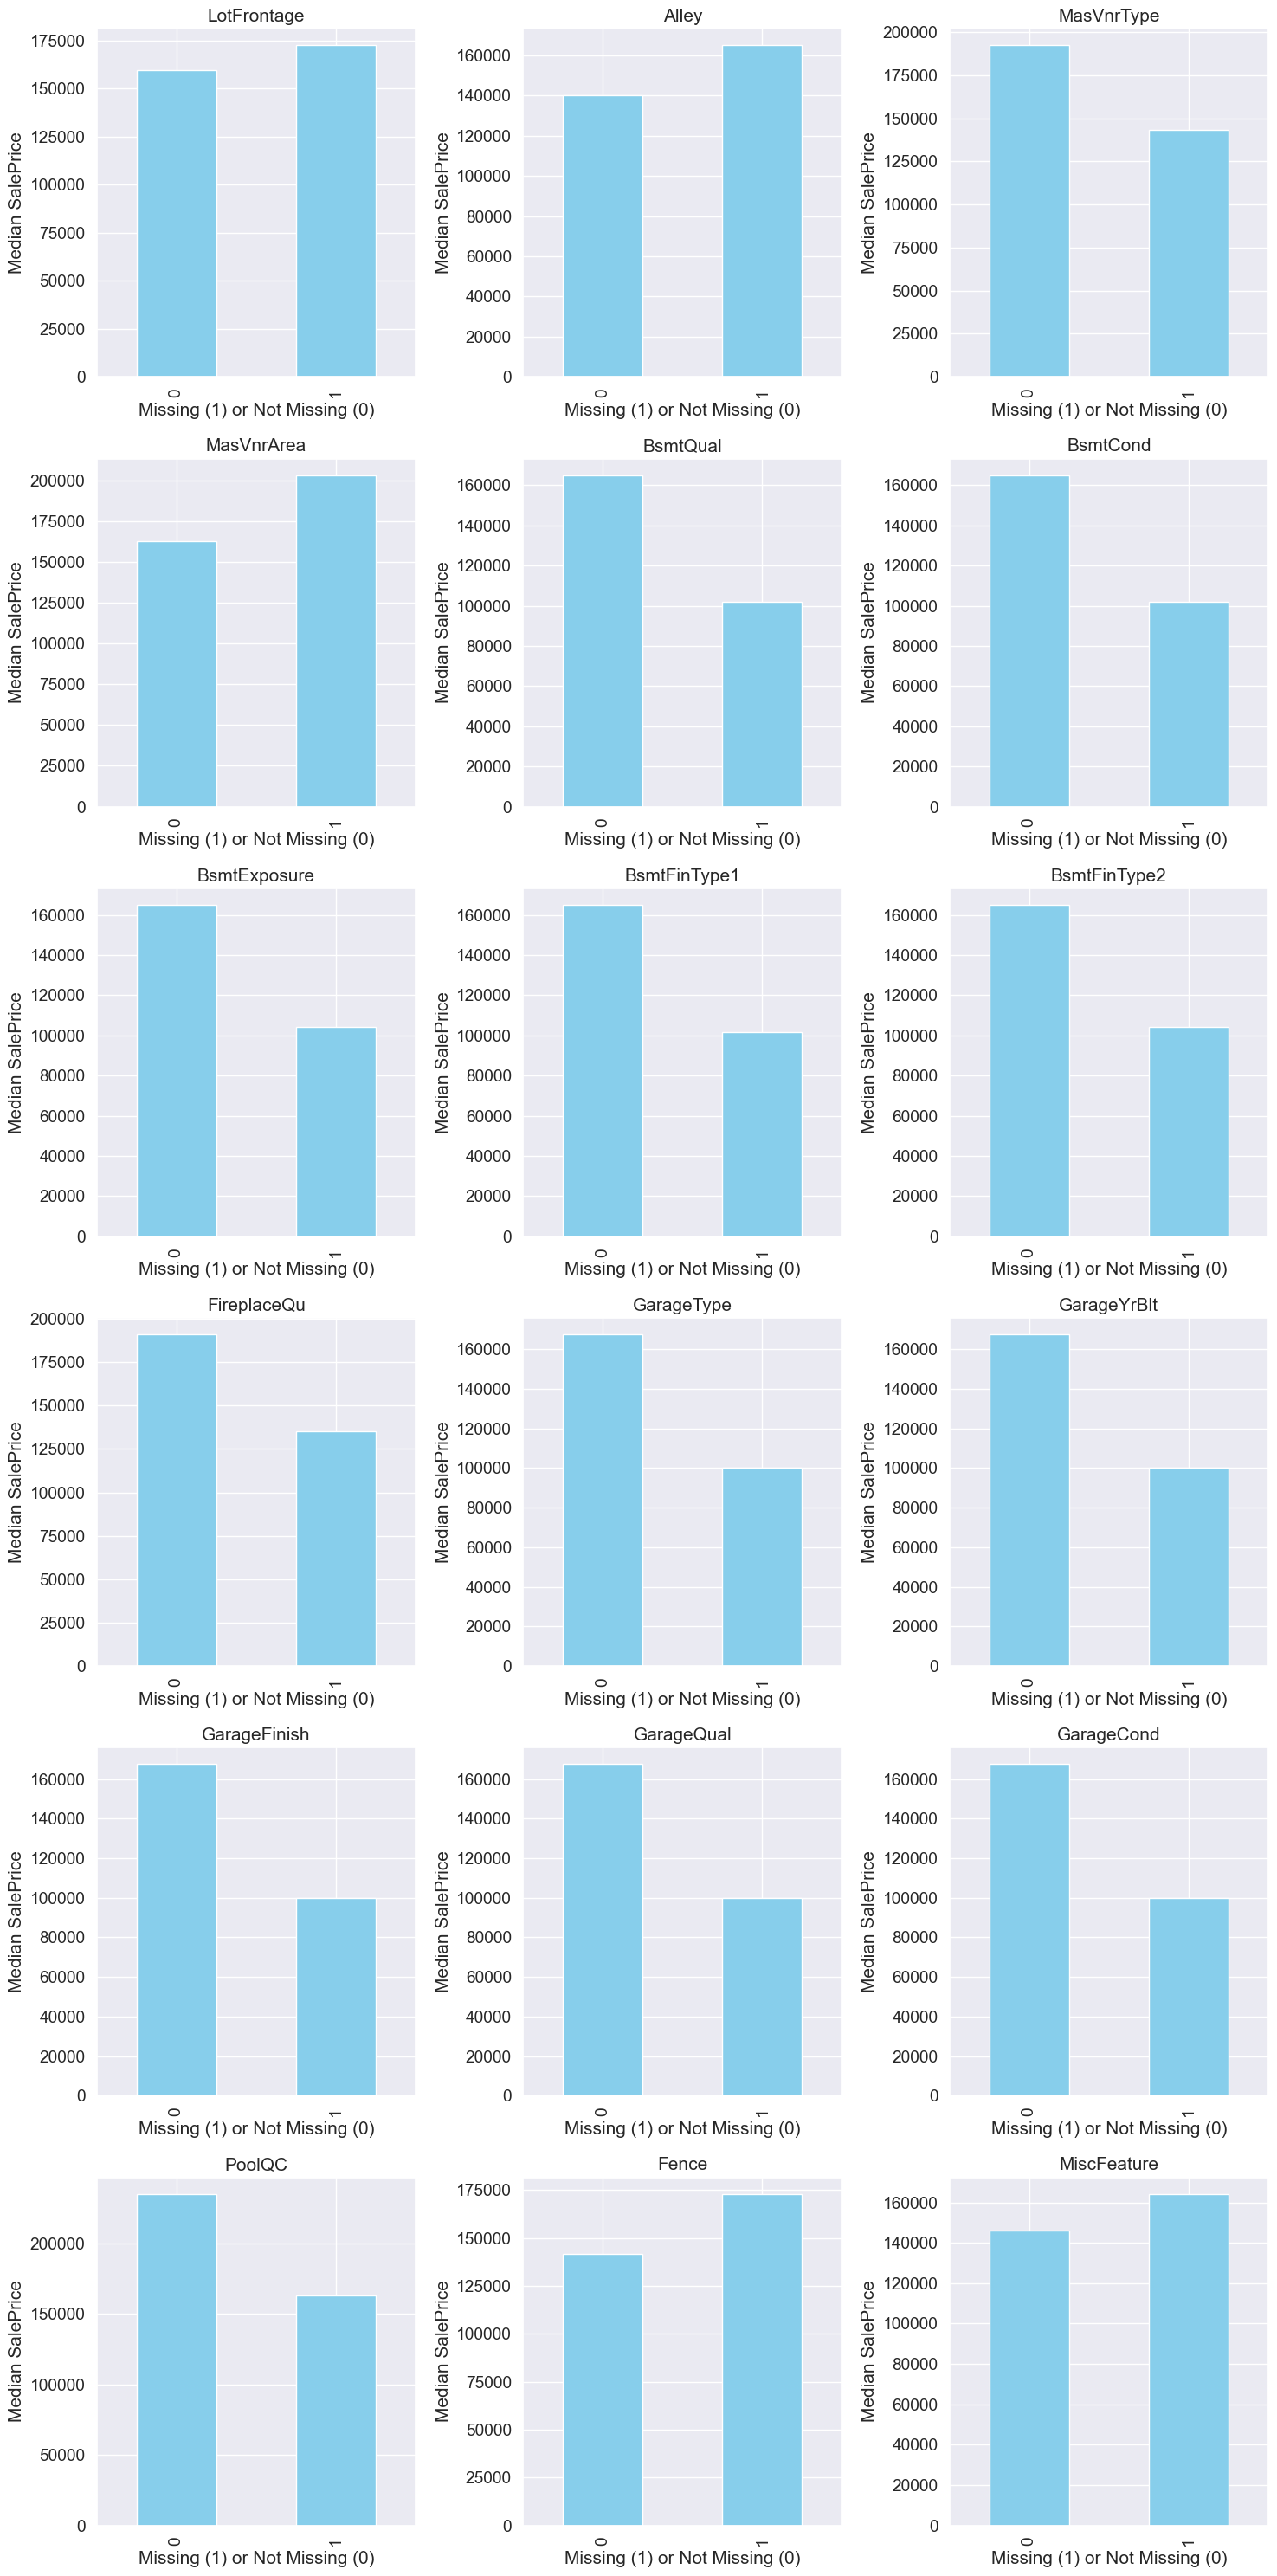

In [43]:
# Number of features to plot
n_features = len(features_na)

# Define the number of rows and columns for the subplot grid
n_cols = 3
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flattening the axes for easy iteration

# Iterate over each feature and its corresponding subplot axis
for i, feature in enumerate(features_na):
    df1 = df.copy()  # Create a copy of the DataFrame
    df1[feature] = np.where(df1[feature].isnull(), 1, 0)  # 1 if NaN, else 0
    
    # Group by NaN status and plot the median SalePrice
    df1.groupby(feature)['SalePrice'].median().plot.bar(ax=axes[i], color='skyblue')
    
    # Set title and labels
    axes[i].set_title(feature)
    axes[i].set_ylabel('Median SalePrice')
    axes[i].set_xlabel('Missing (1) or Not Missing (0)')
    
# Remove any unused subplot axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**There is a clear relationship between missing values and the sale price of the house. Therefore, the missing values should be replaced with appropriate and meaningful values.**

### Identifying Discrete Features

In [44]:
# Define a threshold for discrete features
DISCRETE_THRESHOLD = 25

# Identify discrete numerical features
discrete_feature = [
    feature for feature in numerical_features
    if df[feature].nunique(dropna=True) < DISCRETE_THRESHOLD
    and feature not in year_feature + ['Id']
]

# Display the count and names of discrete features
print(f"Discrete Variables Count: {len(discrete_feature)}")
print("Discrete Features:", discrete_feature)

Discrete Variables Count: 17
Discrete Features: ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold']


I identified the discrete numerical features in the dataset, where features with fewer than 25 unique values are classified as discrete. Exclusions were made for year-related features and identifiers, as these are not treated as discrete variables.

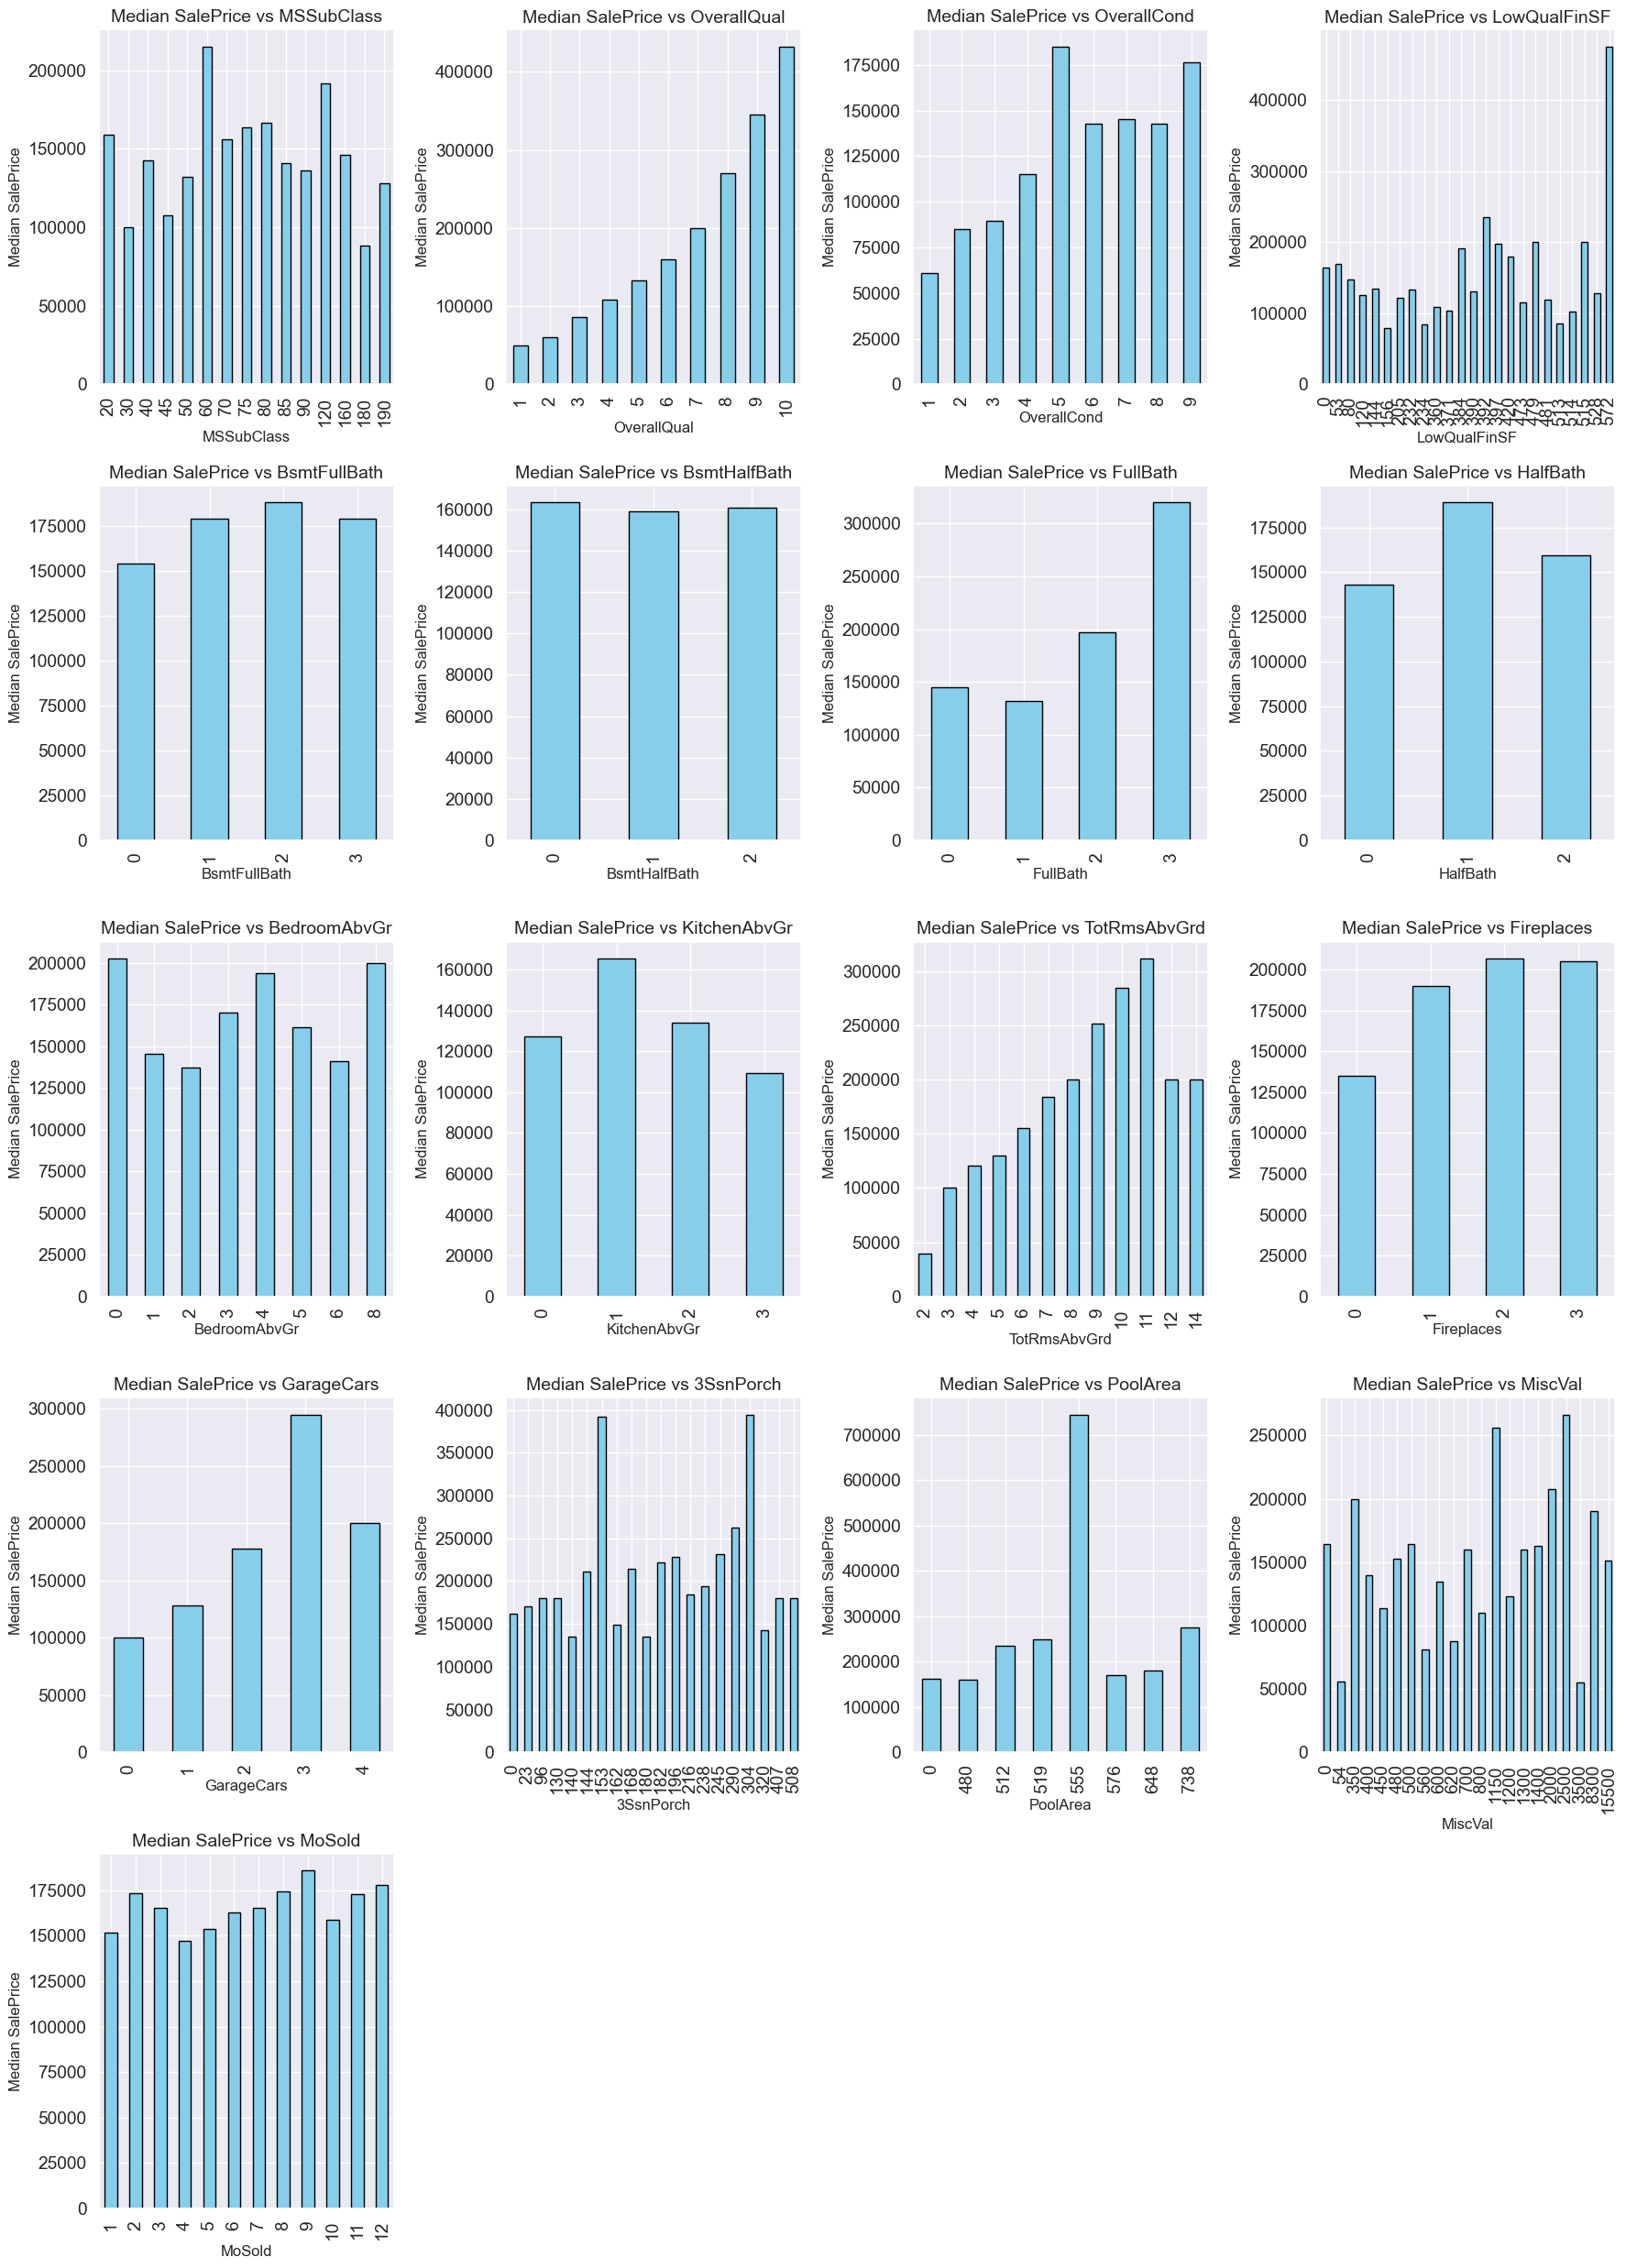

In [45]:
# Number of discrete features to plot
n_features = len(discrete_feature)

# Define the number of rows and columns for the subplot grid
n_cols = 4  # Set the number of columns
n_rows = (n_features // n_cols) + (n_features % n_cols > 0)  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()  # Flattening the axes for easy iteration

# Iterate over each discrete feature and its corresponding subplot axis
for i, feature in enumerate(discrete_feature):
    data = df.copy()

    # Calculate median SalePrice for each category of the feature
    median_sale_price = data.groupby(feature)['SalePrice'].median().sort_index()

    # Plot the bar chart on the respective subplot axis
    median_sale_price.plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')

    # Set title and labels
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Median SalePrice', fontsize=12)
    axes[i].set_title(f'Median SalePrice vs {feature}', fontsize=14)

# Remove unused subplot axes, if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()

**There is a relationship between discrete features and output variable (SalePrice)**
- As the overall quality increases, the median sales price increases as well
- Monotonic relationship in FullBath also

### **Identifying Continuous Variables**

In [46]:
continuous_feature = [feature for feature in numerical_features if feature not in discrete_feature + year_feature + ['Id']]

In [47]:
print(f"Number of continuous features will be {len(continuous_feature)}")

Number of continuous features will be 16


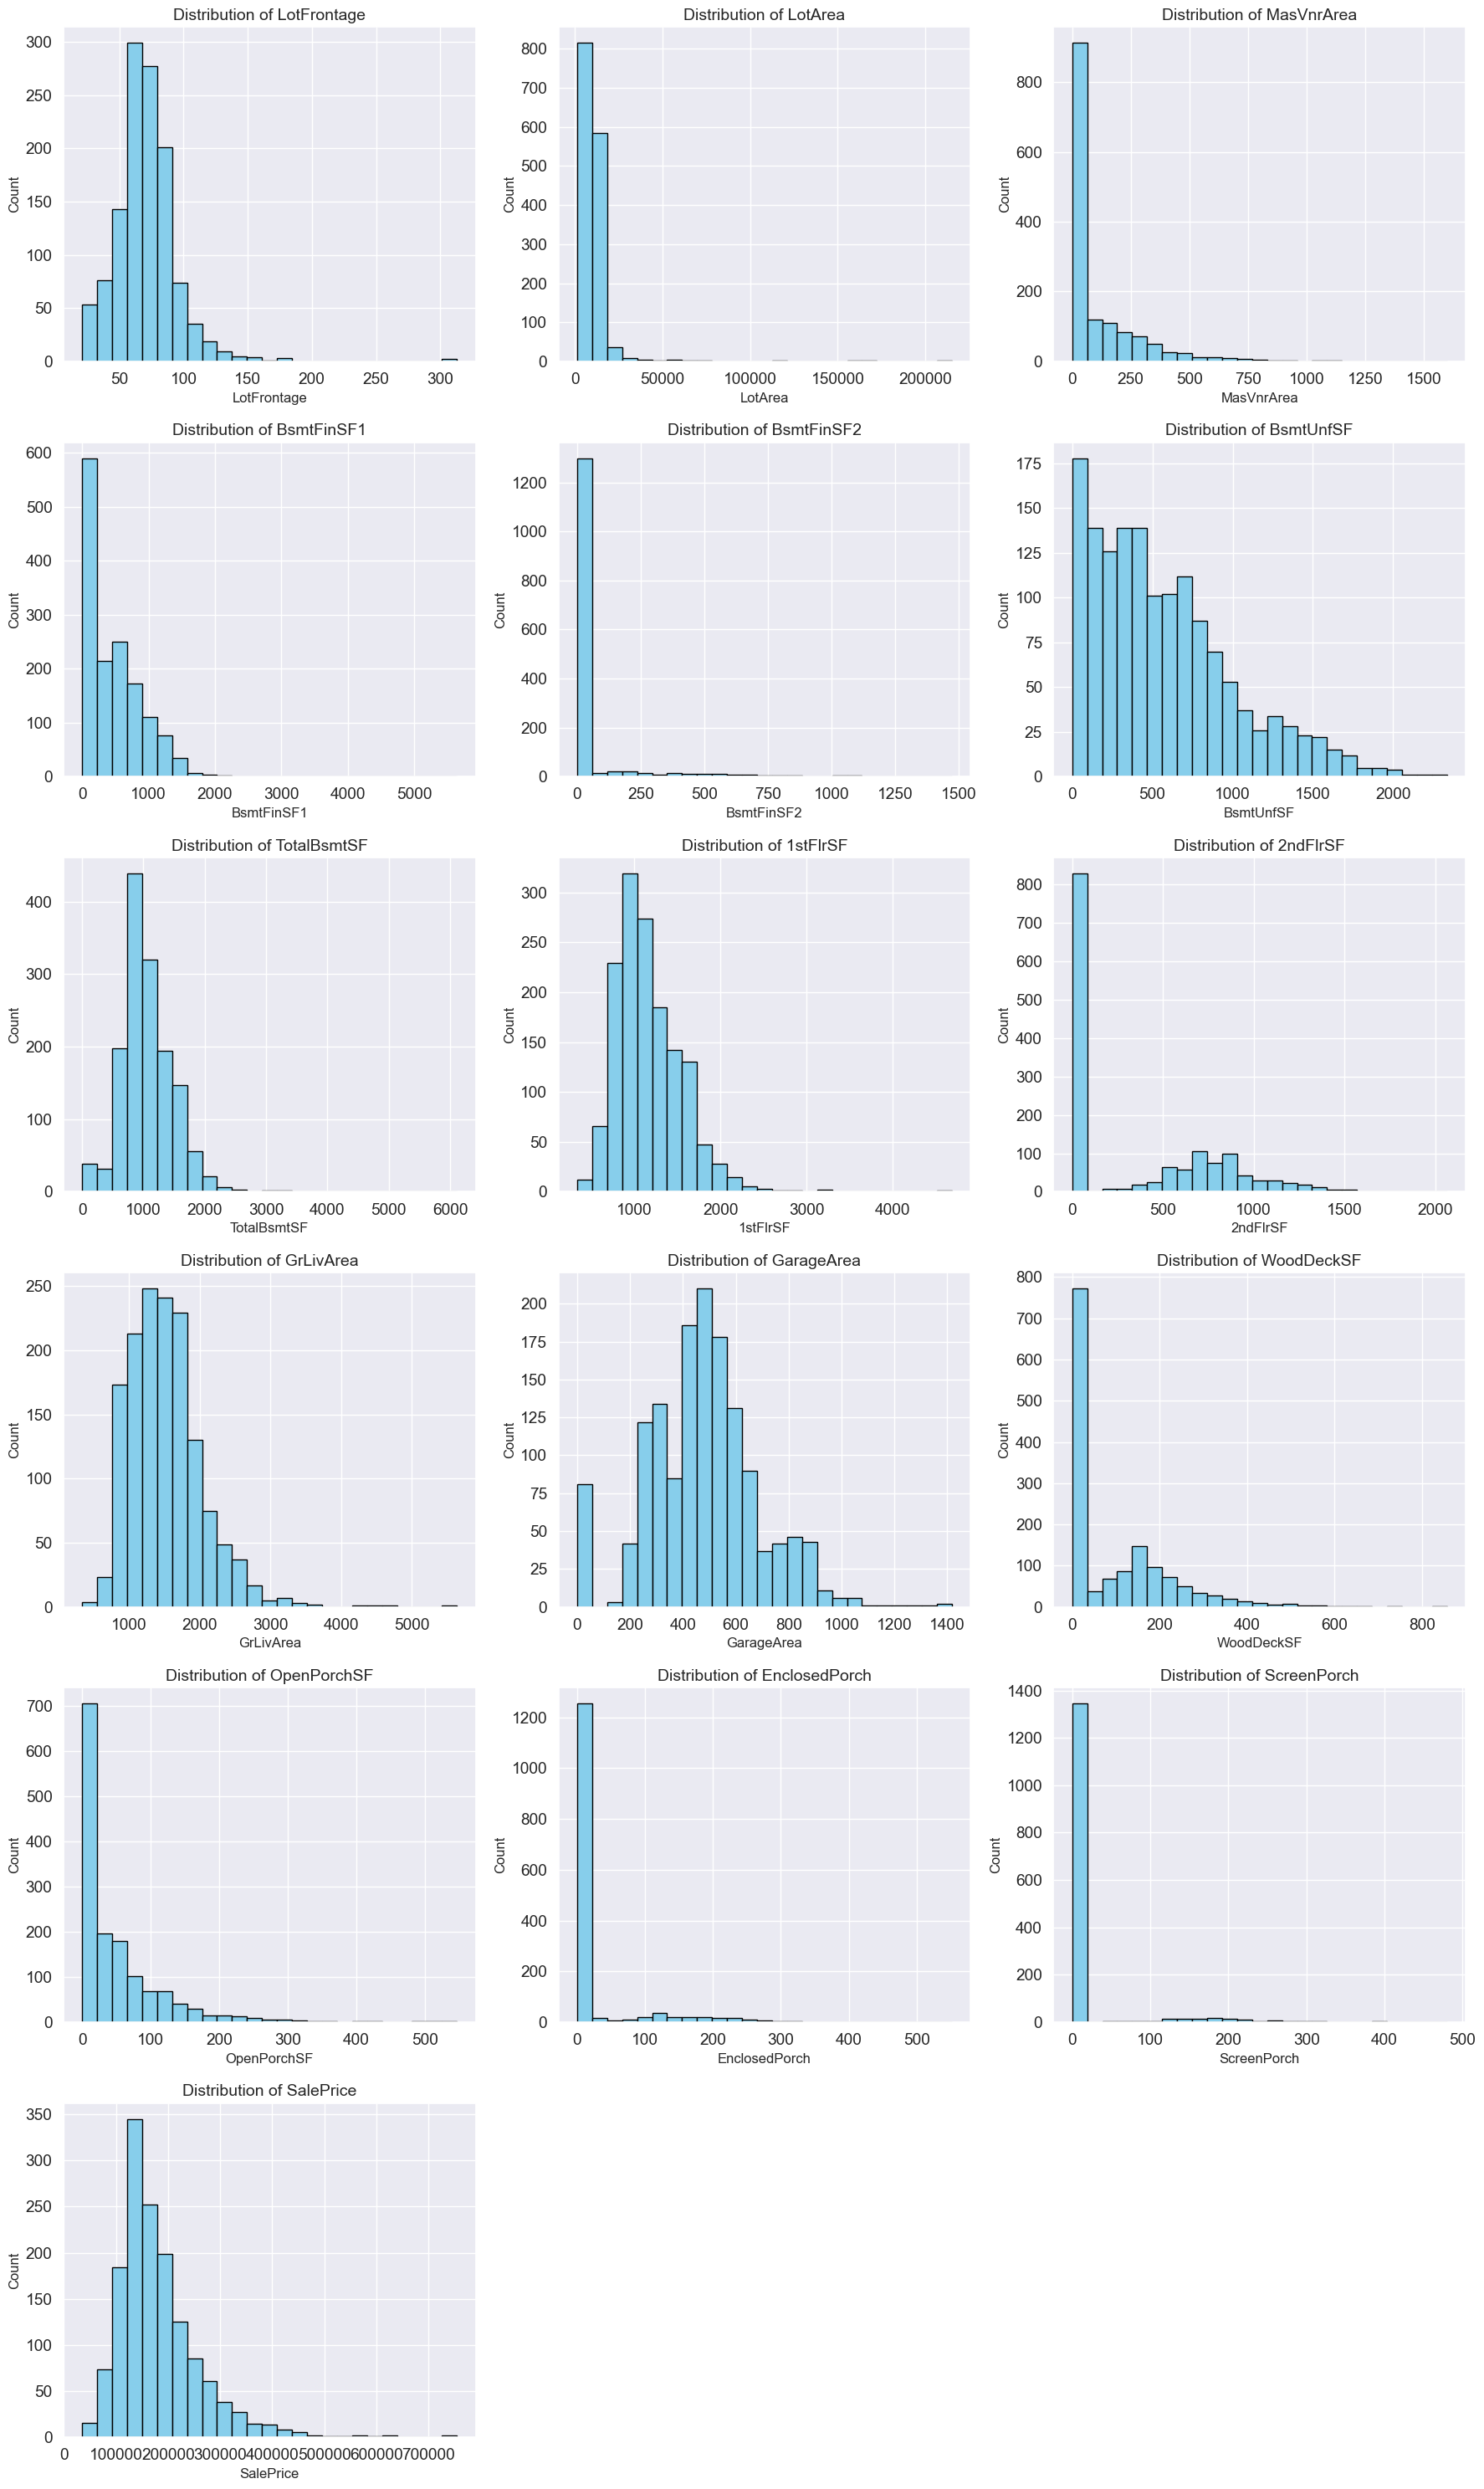

In [48]:
# Number of continuous features to plot
n_continuous_features = len(continuous_feature)

# Define the number of rows and columns for the subplot grid
n_cols = 3  # Set the number of columns
n_rows = (n_continuous_features // n_cols) + (n_continuous_features % n_cols > 0)  # Calculate the number of rows

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 5))
axes = axes.flatten()  # Flattening the axes for easy iteration

# Iterate over each continuous feature and its corresponding subplot axis
for i, feature in enumerate(continuous_feature):
    data = df.copy()

    # Plot the histogram on the respective subplot axis
    data[feature].hist(bins=25, ax=axes[i], color='skyblue', edgecolor='black')

    # Set title and labels
    axes[i].set_xlabel(feature, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_title(f'Distribution of {feature}', fontsize=14)

# Remove unused subplot axes, if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

**Variables follow a skewed distribution**

#### Applying Log Tranformation

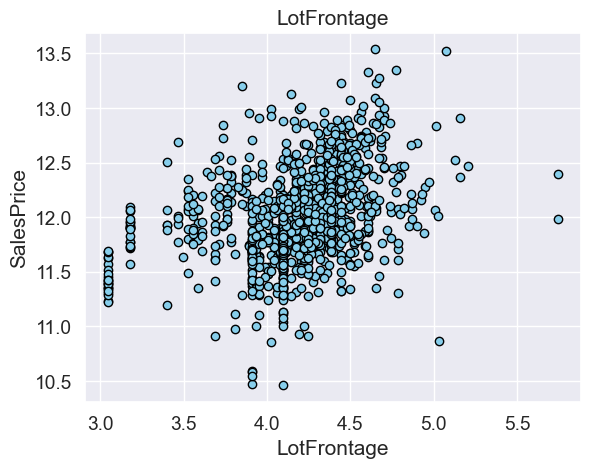

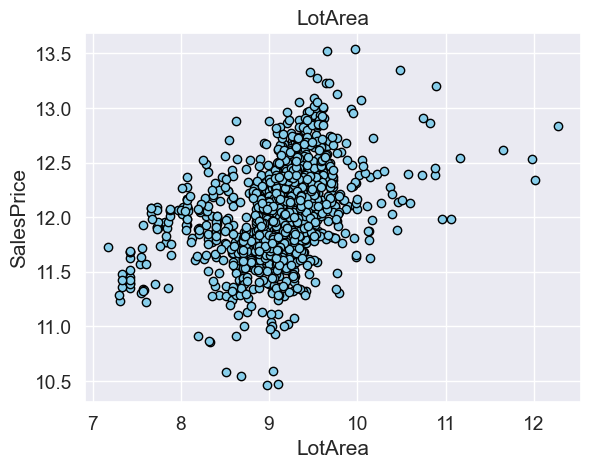

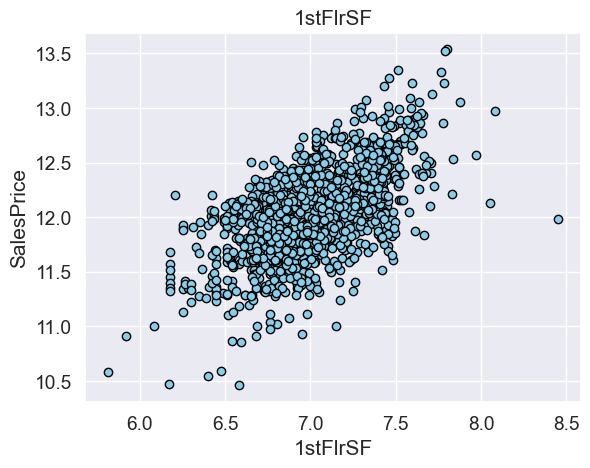

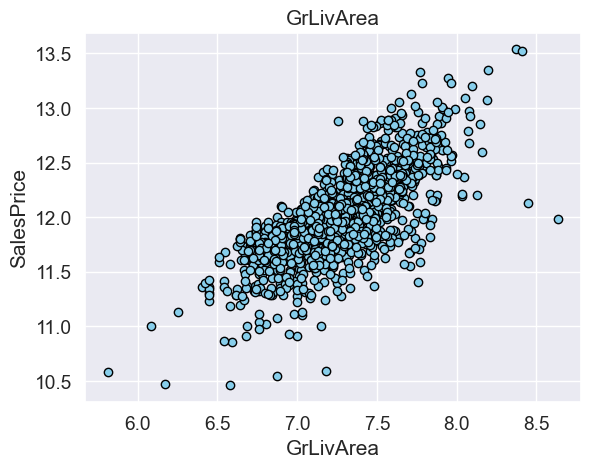

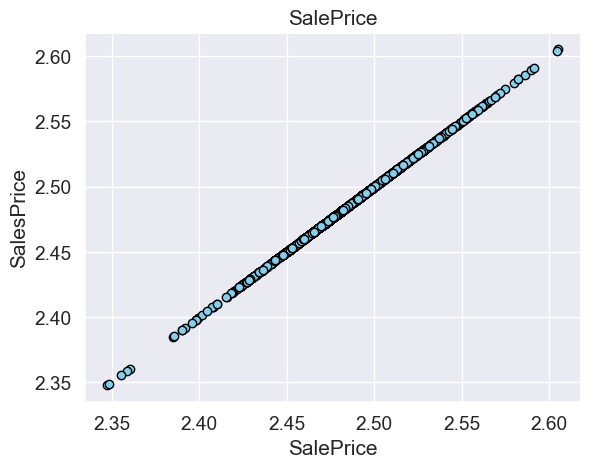

In [49]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique(): ## Logarithmic tranformation could not handle zero values
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'], color='skyblue', edgecolor='black')
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()

- The scatter plots above show the relationship between log-transformed continuous features and the log-transformed SalePrice
- All the continuous variables are giving positive monotonic relationship with SalePrice

#### Finding Outliers

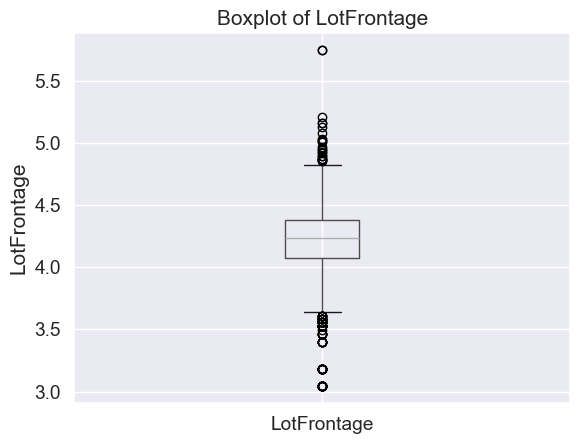

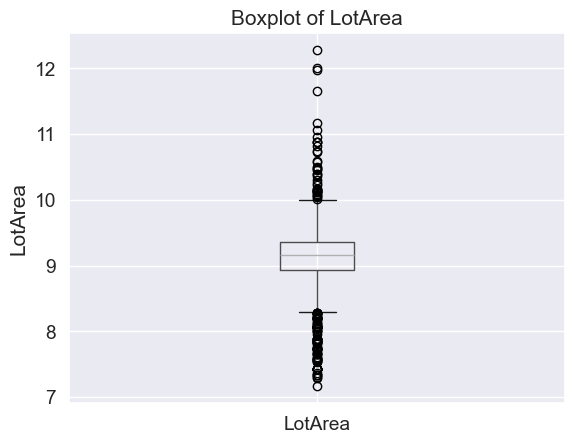

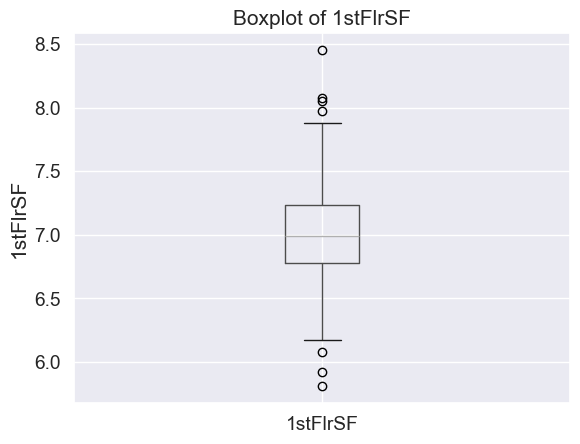

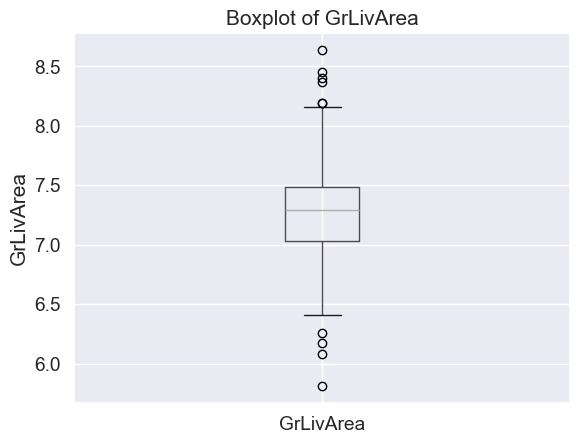

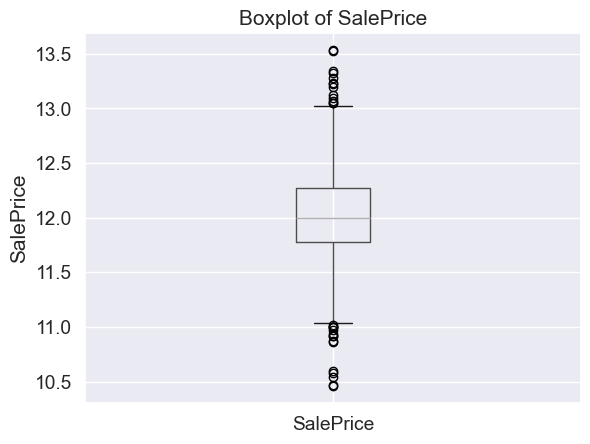

In [50]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=df.copy()
    if 0 in data[feature].unique(): ## Logarithmic tranformation could not handle zero values
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column = feature)
        plt.ylabel(feature)
        plt.title(f"Boxplot of {feature}")
        plt.show()

**There are a lot of **outliers** in continuous variables**

#### Idenitfying Categorical Features

In [51]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']
print(categorical_features)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [52]:
df[categorical_features].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd        NaN        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng        NaN        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

**Whenever we deal with categorical features, do check their cardinality!**

In [53]:
for k in categorical_features:
    num_categories = len(df[k].dropna().unique())  # Exclude NaN values from the count
    print(f'The feature is "{k}" and the number of categories is {num_categories}')
    print('-' * 50)  # Separator for readability

The feature is "MSZoning" and the number of categories is 5
--------------------------------------------------
The feature is "Street" and the number of categories is 2
--------------------------------------------------
The feature is "Alley" and the number of categories is 2
--------------------------------------------------
The feature is "LotShape" and the number of categories is 4
--------------------------------------------------
The feature is "LandContour" and the number of categories is 4
--------------------------------------------------
The feature is "Utilities" and the number of categories is 2
--------------------------------------------------
The feature is "LotConfig" and the number of categories is 5
--------------------------------------------------
The feature is "LandSlope" and the number of categories is 3
--------------------------------------------------
The feature is "Neighborhood" and the number of categories is 25
----------------------------------------------

**Note that the variables: 'Neighbourhood' (25), 'Exterior1st'(15) and 'Exterior2nd' (16) have a lot of categories**

In [54]:
# Create a list to store the feature and its number of categories
feature_categories = [(k, len(df[k].dropna().unique())) for k in categorical_features]

# Sort the list in descending order based on the number of categories
feature_categories_sorted = sorted(feature_categories, key=lambda x: x[1], reverse=True)

# Print the sorted features and their number of categories
for feature, num_categories in feature_categories_sorted:
    print(f'The feature is "{feature}" and the number of categories is {num_categories}')
    print('-' * 50)  # Separator for readability

The feature is "Neighborhood" and the number of categories is 25
--------------------------------------------------
The feature is "Exterior2nd" and the number of categories is 16
--------------------------------------------------
The feature is "Exterior1st" and the number of categories is 15
--------------------------------------------------
The feature is "Condition1" and the number of categories is 9
--------------------------------------------------
The feature is "SaleType" and the number of categories is 9
--------------------------------------------------
The feature is "Condition2" and the number of categories is 8
--------------------------------------------------
The feature is "HouseStyle" and the number of categories is 8
--------------------------------------------------
The feature is "RoofMatl" and the number of categories is 8
--------------------------------------------------
The feature is "Functional" and the number of categories is 7
-------------------------------

## Imputing Null Values
With data this large, it is not surprising that there are a lot of missing values in the cells. In order to effectively train the model, one must first deal with the missing values. There are missing values for both numerical and categorical data.

For numerical imputing, one would typically fill the missing values with a measure like median, mean, or mode. For categorical imputing, I chose to fill the missing values with the most common term that appeared from the entire column.

### Places Where NaN Means Something
If you look at the data description file provided, you will see that for some categories, NaN actually means something. This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house. Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [55]:
#you can find these features on the description data file provided
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [56]:
for i in null_has_meaning:
    df[i].fillna("None", inplace=True)  # Fill missing values with 'None'

***For the specified features, missing values are replaced with 'None' since their absence is considered meaningful in the context of the data. This ensures that no missing values remain and allows these features to be used in categorical analysis or modeling.***

##### Imputing "Real" NaN Values

These are the real NaN values that we have to deal with accordingly because they were not recorded.

In [57]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Example data (replace 'house' with your DataFrame)
data = df.copy()

# Create a SimpleImputer object with the "median" strategy
imputer = SimpleImputer(strategy="median")

In [58]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

Total   Percent
MasVnrType     872  0.597260
LotFrontage    259  0.177397
GarageYrBlt     81  0.055479
MasVnrArea       8  0.005479
Electrical       1  0.000685
KitchenQual      0  0.000000

**LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it. Further, it has low correlation with SalePrice**

In [59]:
df.drop("LotFrontage", axis=1, inplace=True)

In [60]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
MasVnrType     872  0.597260
GarageYrBlt     81  0.055479
MasVnrArea       8  0.005479
Electrical       1  0.000685
KitchenQual      0  0.000000

GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values. MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.

In [61]:
from sklearn.impute import SimpleImputer
import pandas as pd

# Select the numerical columns with missing values
numerical_cols = ['GarageYrBlt', 'MasVnrArea']

# Create a SimpleImputer object with the "median" strategy for numerical columns
imputer = SimpleImputer(strategy="median")

# Apply the imputer on the selected numerical columns
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# For categorical columns like 'MasVnrType', you can still use fillna() manually
df["MasVnrType"].fillna("None", inplace=True)

In [62]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 1]

for feature in features_na:
    missing_percentage = np.round(df[feature].isnull().mean() * 100, 2)
    print(f"Feature '{feature}': {missing_percentage}% missing values")

In [63]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total   Percent
Electrical       1  0.000685
MSSubClass       0  0.000000
GarageYrBlt      0  0.000000
GarageType       0  0.000000
FireplaceQu      0  0.000000

**Now that only one row has a null entry, we will drop the row.**

In [64]:
df.dropna(inplace=True)

In [65]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

Total  Percent
Id               0      0.0
MSSubClass       0      0.0
GarageYrBlt      0      0.0
GarageType       0      0.0
FireplaceQu      0      0.0

In [66]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   Alley          1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuilt    

In [67]:
### Now we will determine the data type of all features remaining

In [68]:
# Get the types of each feature in the DataFrame
types_train = df.dtypes  # Type of each feature in the data: int, float, object

# Select numerical features: either int64 or float
num_train = types_train[(types_train == 'int64') | (types_train == 'float64')]

# Select categorical features: type object
cat_train = types_train[types_train == 'object']

In [69]:
# Count the occurrences of each data type in the DataFrame
df.dtypes.value_counts()

object     43
int64      35
float64     2
Name: count, dtype: int64

In [70]:
# Convert the index of numerical features to a list
numerical_values_train = list(num_train.index)

In [71]:
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [72]:
print(len(numerical_values_train))

37


In [73]:
# Convert the index of categorical features to a list
categorical_values_train = list(cat_train.index)

# Print the list of categorical features
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [74]:
print(len(categorical_values_train))

43


### Data Preparation/Feature Engineering

Now that we've handled all the missing values, it's time to move on to feature engineering, the next phase of data preprocessing. To prepare the data for training the model, we need to create feature vectors by converting categorical variables into numerical representations.

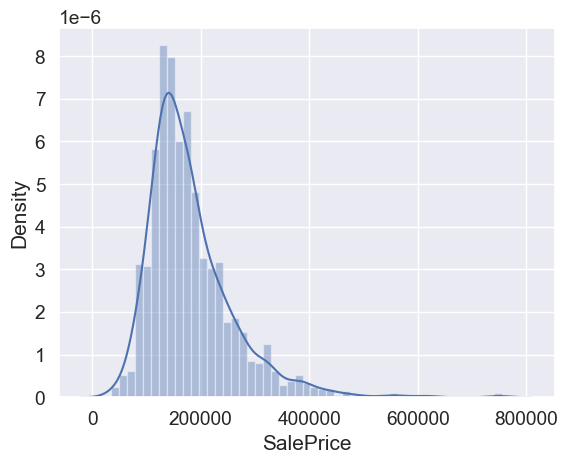

In [75]:
sns.distplot(df["SalePrice"])
plt.show()

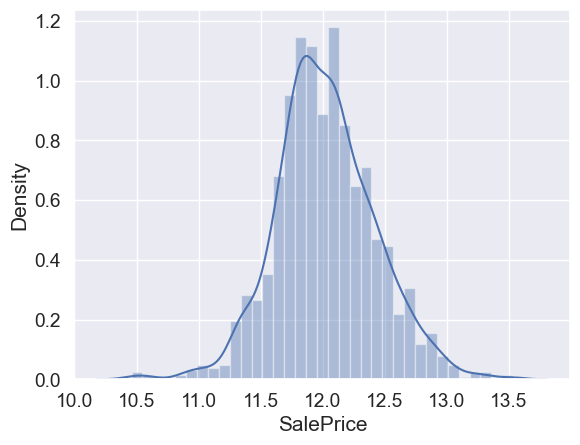

In [76]:
sns.distplot(np.log(df["SalePrice"]))
plt.show()

It seems that the target variable, SalePrice, is heavily skewed, and applying a logarithmic transformation would help normalize its distribution. Machine learning models typically perform better with normally distributed targets, rather than highly skewed ones. By transforming SalePrice, we can improve the model's performance.

In [77]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np

# Apply log transformation to SalePrice and create a new column 'TransformedPrice'
df["TransformedPrice"] = np.log(df["SalePrice"])

# Initialize the LabelEncoder for categorical variables
le = LabelEncoder()

# Convert categorical values into numerical values using LabelEncoder
for i in categorical_values_train:
    df[i] = le.fit_transform(df[i])
# Display the first few rows of the updated DataFrame
df.head()

Id  MSSubClass  MSZoning  LotArea  Street  Alley  LotShape  LandContour  \
0   1          60         3     8450       1      1         3            3   
1   2          20         3     9600       1      1         3            3   
2   3          60         3    11250       1      1         0            3   
3   4          70         3     9550       1      1         0            3   
4   5          60         3    14260       1      1         0            3   

   Utilities  LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
0          0          4          0             5           2           2   
1          0          2          0            24           1           2   
2          0          4          0             5           2           2   
3          0          0          0             6           2           2   
4          0          2          0            15           2           2   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         0           5            7            5       2003          2003   
1         0           2            6            8       1976          1976   
2         0           5            7            5       2001          2002   
3         0           5            7            5       1915          1970   
4         0           5            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          1         1           12           13           1       196.0   
1          1         1            8            8           2         0.0   
2          1         1           12           13           1       162.0   
3          1         1           13           15           2         0.0   
4          1         1           12           13           1       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          2          4           2         2         4             3   
1          3          4           1         2         4             1   
2          2          4           2         2         4             2   
3          3          4           0         4         1             3   
4          2          4           2         2         4             0   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             2         706             6           0        150          856   
1             0         978             6           0        284         1262   
2             2         486             6           0        434          920   
3             0         216             6           0        540          756   
4             2         655             6           0        490         1145   

   Heating  HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  \
0        1          0           1           4       856       854   
1        1          0           1           4      1262         0   
2        1          0           1           4       920       866   
3        1          2           1           4       961       756   
4        1          0           1           4      1145      1053   

   LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0             0       1710             1             0         2         1   
1             0       1262             0             1         2         0   
2             0       1786             1             0         2         1   
3             0       1717             1             0         1         0   
4             0       2198             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            2             8           6   
1             3             1            3             6           6   
2             3             1            2             6           6   
3             3             1            2           

In [78]:
df.shape

(1459, 81)

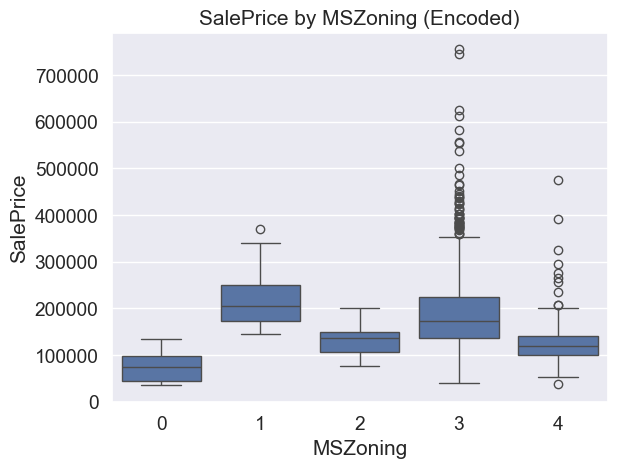

In [79]:
##Encoding and Visualization

sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('SalePrice by MSZoning (Encoded)')
plt.show()

The log transformation has been applied to SalePrice, and categorical features have been efficiently converted to numerical values using LabelEncoder.

We are now ready to build a model!

### Model Building & Evaluation

Now that we've preprocessed and explored our data, we have a much better understanding of the type of data that we're dealing with. Now, we can began to build and test different models for regression to predict the Sale Price of each house.

In [80]:
X = df.drop(["Id", "SalePrice", "TransformedPrice"], axis=1).values
y = df["TransformedPrice"].values

In [81]:
from sklearn.model_selection import train_test_split

# Now you can use train_test_split as you intended
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size=0.3, random_state=123)

In [82]:
# Expanded list of alphas to tune
params = {'alpha': [0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15, 20, 30, 40, 50, 
                    100, 200, 300, 400, 500, 1000, 2000, 5000, 10000]}

In [83]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

### Lasso Regression

Fitting 5 folds for each of 43 candidates, totalling 215 fits


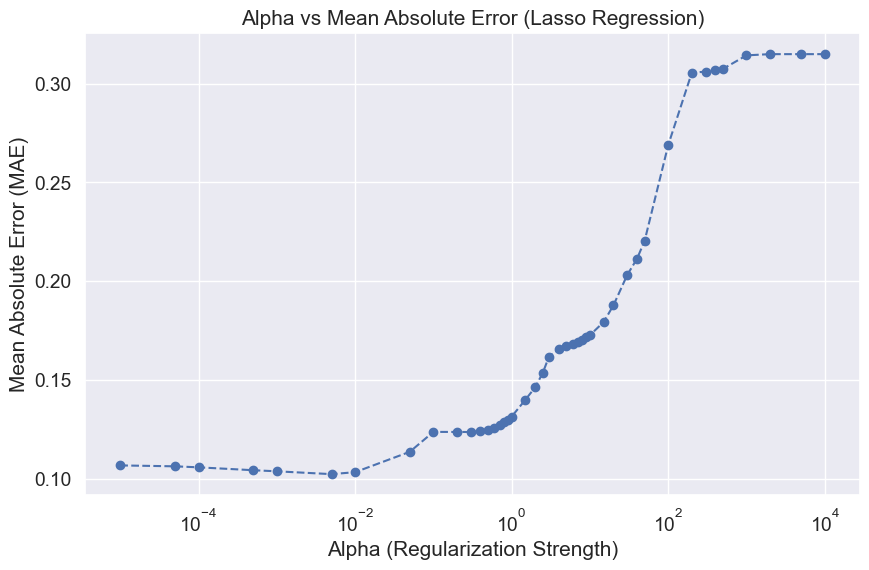

Best alpha: 0.005
Best score: 0.10236196310208527


In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Applying Lasso
lasso = Lasso()

# Number of cross-validation folds
folds = 5

# Perform grid search with cross-validation
model_cv = GridSearchCV(estimator=lasso, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)

# Fit the model on the training data
model_cv.fit(X_train, y_train)

# Extract the results from the grid search
results = model_cv.cv_results_

# Plot the mean test score (negative mean absolute error)
plt.figure(figsize=(10, 6))
alphas = params['alpha']
mean_test_scores = results['mean_test_score']  # Negative MAE scores

# Convert the negative MAE scores back to positive for easier understanding
plt.plot(alphas, -mean_test_scores, marker='o', linestyle='--', color='b')

plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Alpha vs Mean Absolute Error (Lasso Regression)')
plt.xscale('log')  # Use a log scale for alpha
plt.grid(True)
plt.show()

# Print the best alpha and best score
print(f"Best alpha: {model_cv.best_params_['alpha']}")
print(f"Best score: {-model_cv.best_score_}")  # Convert negative score back to positive

# Evaluate on the test set
y_pred = model_cv.predict(X_test)

The plot shows the relationship between the regularization strength (alpha) and the mean absolute error (MAE) for Lasso regression. The x-axis uses a logarithmic scale to represent alpha, while the y-axis shows the mean absolute error. This visualization helps identify the optimal value of alpha that minimizes error.

In [85]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_alpha  \
0       0.009404      0.006343         0.000997        0.000009      0.00001   
1       0.006602      0.003725         0.000998        0.000003      0.00005   
2       0.006596      0.002725         0.001204        0.000402      0.00010   
3       0.004597      0.000800         0.000802        0.000401      0.00050   
4       0.004402      0.001019         0.001000        0.000002      0.00100   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-05}          -0.107703          -0.097427          -0.111575   
1   {'alpha': 5e-05}          -0.107572          -0.097504          -0.111535   
2  {'alpha': 0.0001}          -0.107415          -0.097601          -0.111517   
3  {'alpha': 0.0005}          -0.107626          -0.097607          -0.110806   
4   {'alpha': 0.001}          -0.107894          -0.097359          -0.109949   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.106707          -0.110487        -0.106780        0.005001   
1          -0.106346          -0.108622        -0.106316        0.004728   
2          -0.105910          -0.106594        -0.105807        0.004542   
3          -0.103198          -0.102507        -0.104349        0.004530   
4          -0.101686          -0.102097        -0.103797        0.004548   

   rank_test_score  split0_train_score  split1_train_score  \
0                7           -0.091435           -0.098635   
1                6           -0.091464           -0.098578   
2                5           -0.091507           -0.098532   
3                4           -0.091921           -0.098179   
4                3           -0.092428           -0.098034   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.095017           -0.096060           -0.086480   
1           -0.094973           -0.096024           -0.086522   
2           -0.094926           -0.095998           -0.086612   
3           -0.094625           -0.095933           -0.086796   
4           -0.094796           -0.095955           -0.087437   

   mean_train_score  std_train_score  
0         -0.093525         0.004213  
1         -0.093512         0.004175  
2         -0.093515         0.004123  
3         -0.093491         0.003912  
4         -0.093730         0.003631

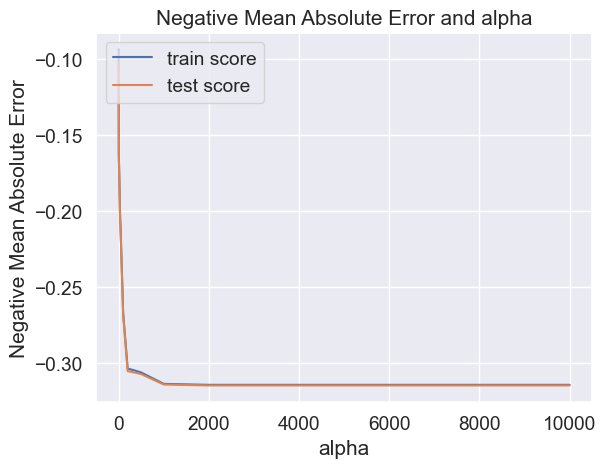

In [86]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

The plot shows that at smaller values of alpha, the model overfits the training data, but as alpha increases, the train and test scores converge. This suggests that regularization improves the model's generalization performance, with an optimal range for alpha between small values like 0.005.

In [87]:
alpha = 50

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [-0.00000000e+00 -0.00000000e+00  4.25284656e-06  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  1.24161384e-04 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  2.77657421e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.0

In [88]:
y_pred = lasso.predict(X_test)

In [89]:
from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Absolute Error: 0.1999545792643324
R² Score: 0.5203784667536133


The Lasso model with alpha = 50 resulted in a Mean Absolute Error (MAE) of 0.1999 and an R² score of 0.5204, indicating that the model explains approximately 52% of the variance in the log-transformed house prices. Further tuning of alpha, feature engineering, or exploring Ridge regression might help improve performance.

In [90]:
alpha = 0.05

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [-6.41077250e-04  0.00000000e+00  1.79417625e-06  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  4.12914792e-02
  0.00000000e+00  3.17482705e-03  3.06828284e-03  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  7.94441021e-06 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  4.98818961e-05  0.00000000e+00  3.51529430e-05 -9.91747436e-11
  7.43295697e-05 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  1.60390689e-04  1.74591474e-04  6.50288913e-07
  1.30949477e-04  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -6.53343494e-04 -0.00000000e+00  0.00000000e+00
  2.6

In [91]:
y_pred = lasso.predict(X_test)

In [92]:
from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")

Mean Absolute Error: 0.09951081725044243
R² Score: 0.859017609433629


The Lasso model with alpha = 0.05 resulted in a Mean Absolute Error (MAE) of 0.099 and an R² score of 0.85 indicating that the model explains approximately 85% of the variance in the log-transformed house prices.

In [93]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Assuming `y_pred` is the predicted log-transformed prices from the Lasso model
# And `y_test` is the actual log-transformed sale prices

# Convert log-transformed predictions back to actual prices
actual_predicted_price = np.exp(y_pred)

# Convert log-transformed actual values back to original scale
actual_y_test = np.exp(y_test)

# Calculate Mean Absolute Error on actual prices
mae_actual = mean_absolute_error(actual_y_test, actual_predicted_price)
print(f"Mean Absolute Error (Actual Prices): {mae_actual}")

# Calculate R² Score (on log-transformed prices)
r2 = r2_score(y_test, y_pred)
print(f"R² Score (Log-Transformed): {r2}")

Mean Absolute Error (Actual Prices): 17829.489173003767
R² Score (Log-Transformed): 0.859017609433629


The Lasso model resulted in a Mean Absolute Error (MAE) of $17,829.49 and an R² score of 0.8590 on the log-transformed sale prices.

#### Ridge Regression

In [94]:
# Applying Ridge Regression
ridge = Ridge()

# Number of cross-validation folds
folds = 5

# Perform grid search with cross-validation
model_cv = GridSearchCV(estimator=ridge, 
                        param_grid=params, 
                        scoring='neg_mean_absolute_error', 
                        cv=folds, 
                        return_train_score=True,
                        verbose=1)

# Fit the model on the training data
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 43 candidates, totalling 215 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0,
                                   5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 15, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
print(f"Best alpha: {model_cv.best_params_['alpha']}")

Best alpha: 200


In [96]:
y_pred = model_cv.predict(X_test)

In [97]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 0.08703872929266541
R² Score: 0.8986964481641936


In [98]:
# Convert log-transformed predictions back to actual prices
actual_predicted_price = np.exp(y_pred)

# Convert log-transformed actual values back to original scale
actual_y_test = np.exp(y_test)

# Calculate Mean Absolute Error on original prices
mae_actual = mean_absolute_error(actual_y_test, actual_predicted_price)
print(f"Mean Absolute Error (Actual Prices): {mae_actual}")

Mean Absolute Error (Actual Prices): 15309.89580161596


The Mean Absolute Error (MAE) on the actual sale prices is approximately $15,310, indicating that, on average, the predictions differ from the actual sale prices by around this amount.

While the Lasso model performed well, the Ridge model showed slightly better performance with lower prediction error and a higher R² score, capturing more variance in the data

In [99]:
# After training your model
import pickle

with open('lasso_model.pkl', 'wb') as file:
    pickle.dump(lasso, file)

In [100]:
with open('ridge_model.pkl', 'wb') as file:
    pickle.dump(ridge, file)

### Preparing the Model for Streamlit App

In [101]:
# retrain_models_with_cv.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
import pickle
import warnings
warnings.filterwarnings("ignore")

# Load the dataset
df = pd.read_csv('house_train.csv')

# Data cleaning and preprocessing steps
# -------------------------------------------------
# Handle missing values as per your previous steps
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
                    "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish",
                    "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in null_has_meaning:
    df[col] = df[col].fillna("None")

# Fill numerical missing values with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['MasVnrType'] = df['MasVnrType'].fillna("None")

# Drop any remaining missing values
df.dropna(inplace=True)

# Transform the target variable
df['TransformedPrice'] = np.log(df['SalePrice'])

# Select the features
selected_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

# Prepare the feature matrix X and target vector y
X = df[selected_features].copy()
y = df['TransformedPrice']

# Apply log transformation to 'GrLivArea' and 'TotalBsmtSF'
X['GrLivArea'] = np.log(X['GrLivArea'] + 1)
X['TotalBsmtSF'] = np.log(X['TotalBsmtSF'] + 1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

# -------------------------------------------------
# Find optimal alpha for Lasso using GridSearchCV
from sklearn.linear_model import Lasso

# Define the parameter grid
lasso_alphas = np.logspace(-4, 0, 50)

lasso = Lasso(max_iter=10000)
lasso_cv = GridSearchCV(
    estimator=lasso,
    param_grid={'alpha': lasso_alphas},
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
lasso_cv.fit(X_train, y_train)

# Best alpha for Lasso
best_alpha_lasso = lasso_cv.best_params_['alpha']
print(f"Optimal alpha for Lasso: {best_alpha_lasso}")

# Retrain Lasso with best alpha
lasso_best = Lasso(alpha=best_alpha_lasso, max_iter=10000)
lasso_best.fit(X_train, y_train)

# Evaluate the Lasso model
y_pred_lasso = lasso_best.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"Lasso Model - MAE: {mae_lasso}, R²: {r2_lasso}")

# Save the Lasso model
with open('lasso_model_5vars_opt.pkl', 'wb') as file:
    pickle.dump(lasso_best, file)

# -------------------------------------------------
# Find optimal alpha for Ridge using GridSearchCV
from sklearn.linear_model import Ridge

ridge_alphas = np.logspace(-2, 3, 50)

ridge = Ridge()
ridge_cv = GridSearchCV(
    estimator=ridge,
    param_grid={'alpha': ridge_alphas},
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1
)
ridge_cv.fit(X_train, y_train)

# Best alpha for Ridge
best_alpha_ridge = ridge_cv.best_params_['alpha']
print(f"Optimal alpha for Ridge: {best_alpha_ridge}")

# Retrain Ridge with best alpha
ridge_best = Ridge(alpha=best_alpha_ridge)
ridge_best.fit(X_train, y_train)

# Evaluate the Ridge model
y_pred_ridge = ridge_best.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"Ridge Model - MAE: {mae_ridge}, R²: {r2_ridge}")

# Save the Ridge model
with open('ridge_model_5vars_opt.pkl', 'wb') as file:
    pickle.dump(ridge_best, file)

Optimal alpha for Lasso: 0.0024420530945486497
Lasso Model - MAE: 0.11995081755141092, R²: 0.8181964382694585
Optimal alpha for Ridge: 2.2229964825261956
Ridge Model - MAE: 0.12011768180173615, R²: 0.8187879636528907
